# Блокнот созданный для тренировки и обучению основам статистики.
  Блокнот создан на основе курса - https://www.youtube.com/playlist?list=PLQJ7ptkRY-xbHLLI66KdscKp_FJt0FsIi

<a name="оглавление"></a>

**Оглавление**


[Урок №1 - Переменные и метрики](#Переменные_и_метрики)

[Урок №2 - Генераторы и Монте-Карло](#Генераторы_и_Монте-Карло)

[Урок №3 - ЗБЧ и ЦПТ](#ЗБЧ_и_ЦПТ)

[Урок №4 - Монте-Карло: практика](#Монте-Карло_практика)

[Урок №5 - Проверка гипотез и p-value](#p-value)

[Урок №6 - А/Б тесты: пропорции](#A|B_prop)

[Урок №7 - А/Б тесты: непрерывные переменные](#A|B_cont)

[Урок №8 - Множественная проверка гипотез](#multi_gip)



<a name="Переменные_и_метрики"></a>

## Урок №1 - Переменные и метрики

[Оглавление](#оглавление)

In [ ]:
# Импорт нужных нам в этом уроке библиотек

import pandas as pd
import numpy as np

import seaborn as sns

In [ ]:
# ссылка для скачивания датасета для первого урока
# https://drive.google.com/file/d/1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6/view?usp=sharing

In [ ]:
# Ставим библиотеку для чтения файла с гугл диска
# Установка библиотеки gdown
!pip install gdown

# Импортируем эту библиотеку
import gdown

# Прочитаем файл с приведённой выше ссылки
# Преобразование ссылки
file_id = '1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6'
download_url = f'https://drive.google.com/uc?id={file_id}'

# Загрузка файла
output = 'file.csv'
gdown.download(download_url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6
To: /content/file.csv
100%|██████████| 38.8k/38.8k [00:00<00:00, 34.7MB/s]


'file.csv'

In [ ]:
# Чтение файла
df = pd.read_csv(output)

# Посмотрим на первыве 10 строк
df.head(10)

,age,number_of_children,income
0,42.772420,0,34396.537188
1,29.561090,0,183350.052521
2,54.380735,0,53689.856555
3,42.551689,0,109080.913926
4,38.713080,0,153612.343419
5,54.643163,0,114836.781583
6,27.372789,0,132556.578233
7,28.350204,2,79137.007762
8,33.676546,0,193091.364233
9,25.659336,1,124276.826089


In [ ]:
# Посчитаем колличество детей, для каждого из возможного значения
df['number_of_children'].value_counts()

number_of_children
0    658
1    226
2     94
3     20
5      1
4      1
Name: count, dtype: int64

In [ ]:
# Предыдущий ответ мы получили в числовом варианте, посмотрим какой процет мы получим для каждого числа
df['number_of_children'].value_counts(normalize = True)

number_of_children
0    0.658
1    0.226
2    0.094
3    0.020
5    0.001
4    0.001
Name: proportion, dtype: float64

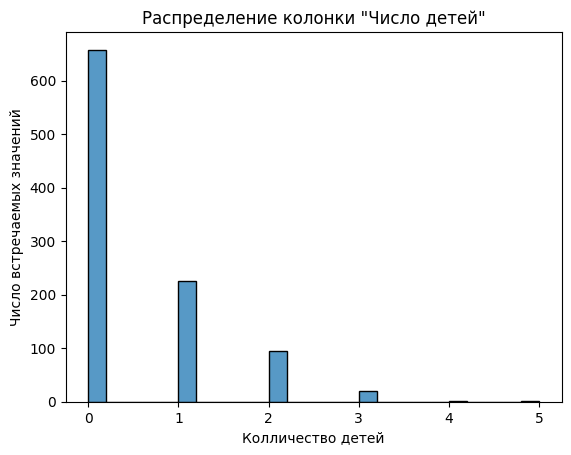

In [ ]:
# Построим гистрограмму распределения для колонки number_of_children

sns_plot = sns.histplot(df['number_of_children'])

# Настройка подписей
sns_plot.set_title('Распределение колонки "Число детей"')
sns_plot.set_xlabel('Колличество детей')
sns_plot.set_ylabel('Число встречаемых значений');

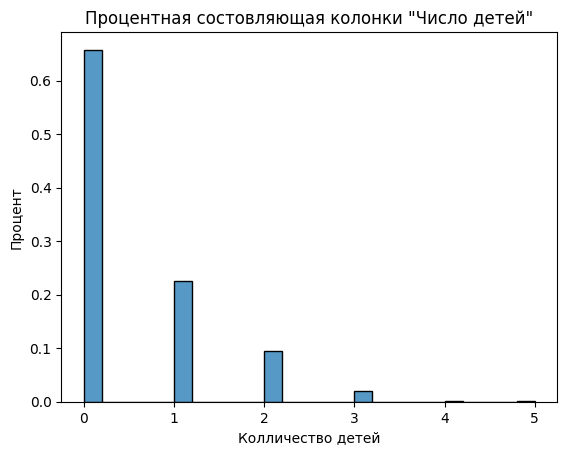

In [ ]:
# Также построим аналогичный график но показывающий нам не общее колличесвто а процентную составляющую класса
sns_plot = sns.histplot(df['number_of_children'], stat = 'probability')

# Настройка подписей
sns_plot.set_title('Процентная состовляющая колонки "Число детей"')
sns_plot.set_xlabel('Колличество детей')
sns_plot.set_ylabel('Процент');

  Прошлый признак был категориальным, поэтому мы получили такую гистограмму
  
  Попробуем построить гистограмму для непрервыной перменной

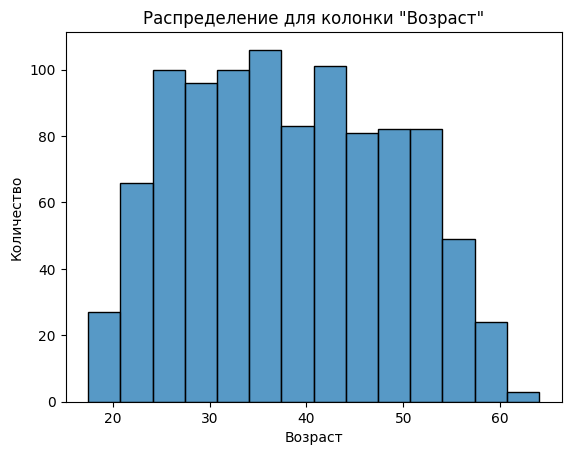

In [ ]:
sns_plot = sns.histplot(df['age'])

# Настройка подписей
sns_plot.set_title('Распределение для колонки "Возраст"')
sns_plot.set_xlabel('Возраст')
sns_plot.set_ylabel('Количество');

In [ ]:
# Разделим имеющиеся значения на группы по возрасту

df['age_bin'] = pd.cut(df['age'], 10)

df

,age,number_of_children,income,age_bin
0,42.772420,0,34396.537188,"(40.743, 45.401]"
1,29.561090,0,183350.052521,"(26.766, 31.425]"
2,54.380735,0,53689.856555,"(50.06, 54.719]"
3,42.551689,0,109080.913926,"(40.743, 45.401]"
4,38.713080,0,153612.343419,"(36.084, 40.743]"
...,...,...,...,...
995,36.281055,0,128647.922872,"(36.084, 40.743]"
996,18.472716,0,67204.531673,"(17.402, 22.107]"
997,40.547748,0,139432.757984,"(36.084, 40.743]"
998,24.791760,1,137526.452334,"(22.107, 26.766]"


In [ ]:
# Посчитаем сколько значений включает каждый диапазонон

df.groupby('age_bin')['age'].count()

age_bin
(17.402, 22.107]     49
(22.107, 26.766]    124
(26.766, 31.425]    140
(31.425, 36.084]    134
(36.084, 40.743]    131
(40.743, 45.401]    141
(45.401, 50.06]     101
(50.06, 54.719]     121
(54.719, 59.378]     50
(59.378, 64.037]      9
Name: age, dtype: int64

  Используем моду для нахождения наиболее часто встречаемого элемента в выборке по колонке 'number_of_children'

In [ ]:
df['number_of_children'].mode()

0    0
Name: number_of_children, dtype: int64

In [ ]:
# Применяем агрегационные функции mean / median

df['income'].agg(['mean','median'])

mean      129415.746378
median    114586.570939
Name: income, dtype: float64

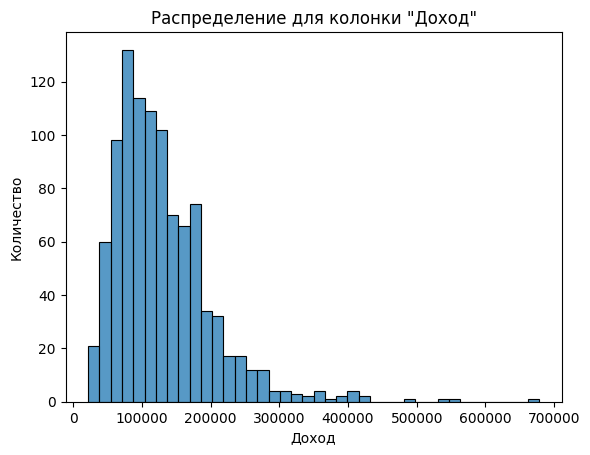

In [ ]:
# Строим гистрограмму для колонки "income"

sns_plot = sns.histplot(df['income'])

# Настройка подписей
sns_plot.set_title('Распределение для колонки "Доход"')
sns_plot.set_xlabel('Доход')
sns_plot.set_ylabel('Количество');

In [ ]:
# Проанализируем колонку income

df['income'].describe()

count      1000.000000
mean     129415.746378
std       71251.620971
min       21943.855414
25%       79594.040400
50%      114586.570939
75%      162888.891081
max      678006.351857
Name: income, dtype: float64

In [ ]:
# Агрегируем наше возрастное разделение

df.groupby('age_bin')['income'].agg(['count','mean','median'])

,count,mean,median
age_bin,,,
"(17.402, 22.107]",49,104319.382165,88163.526875
"(22.107, 26.766]",124,133775.791324,125960.906191
"(26.766, 31.425]",140,130575.738767,114947.477353
"(31.425, 36.084]",134,135654.848704,118368.874351
"(36.084, 40.743]",131,134457.081592,128647.922872
"(40.743, 45.401]",141,139697.676942,123441.920529
"(45.401, 50.06]",101,142814.622910,122199.047306
"(50.06, 54.719]",121,112563.104588,95443.103632
"(54.719, 59.378]",50,104040.538214,91602.734609


<a name="Генераторы_и_Монте-Карло"></a>

## Урок №2 - Генераторы и Монте-Карло

[Оглавление](#оглавление)

In [ ]:
# Импорт нужных нам в этом уроке библиотек

import pandas as pd
import numpy as np

import seaborn as sns

In [ ]:
# Биномиальное распределние (Аналогично подбрасыванию монетки)

result = []
for _ in range(3):
  result.append(np.random.binomial(1,0.5))


result

[0, 1, 1]

In [ ]:
# Подбрасывание кубика

pd.Series([1,2,3,4,5,6]).sample(10,replace=True).reset_index(drop = True)

0    6
1    6
2    3
3    3
4    1
5    1
6    1
7    2
8    3
9    3
dtype: int64

### Визуализация распредлений

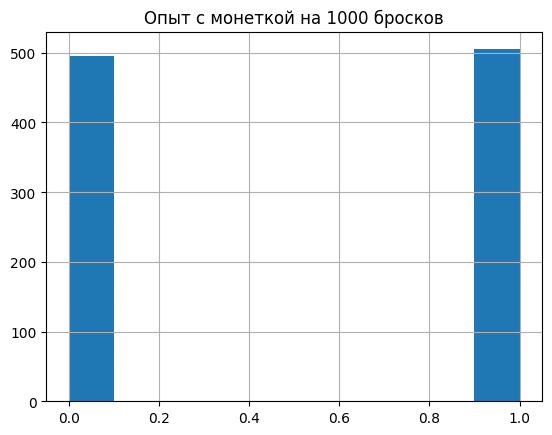

In [ ]:
# Построим гистограммы для
# опыта с монеткой
# опыта с кубиком

sns_plot = pd.Series(np.random.binomial(1, 0.5, size = 1000)).hist()
# Настройка подписей
sns_plot.set_title('Опыт с монеткой на 1000 бросков');

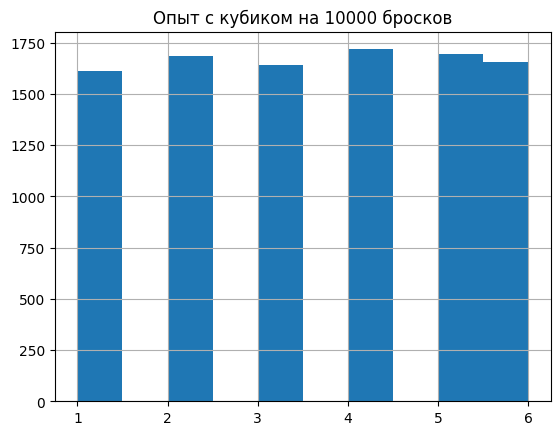

In [ ]:
sns_plot = pd.Series([1, 2, 3, 4, 5, 6]).sample(10000, replace=True).hist()
# Настройка подписей
sns_plot.set_title('Опыт с кубиком на 10000 бросков');

### Виды распределений

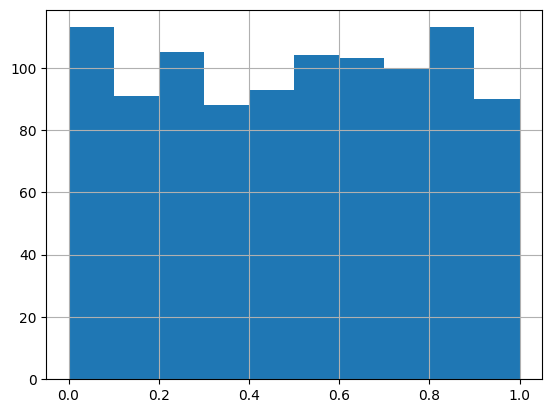

In [ ]:
# Равномерное распредление

pd.Series(np.random.uniform(size=1000)).hist();

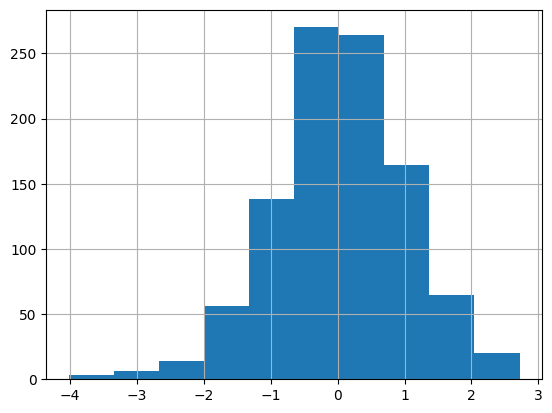

In [ ]:
# Нормальное распределение

pd.Series(np.random.normal(size=1000)).hist();

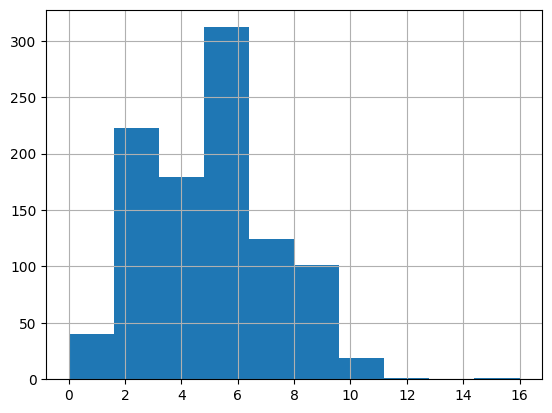

In [ ]:
#  Пуасоновское распредление

pd.Series(np.random.poisson(5, size=1000)).hist();

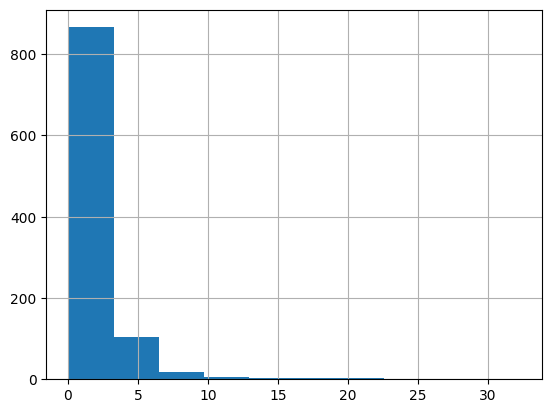

In [ ]:
# Логнормальное распределение

pd.Series(np.random.lognormal(size=1000)).hist();

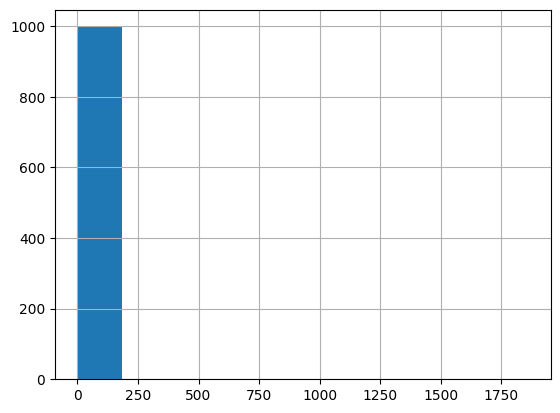

In [ ]:
# Распределение Парето

pd.Series(np.random.pareto(1, size=1000)).hist();

### PDF(PMF) | CDF

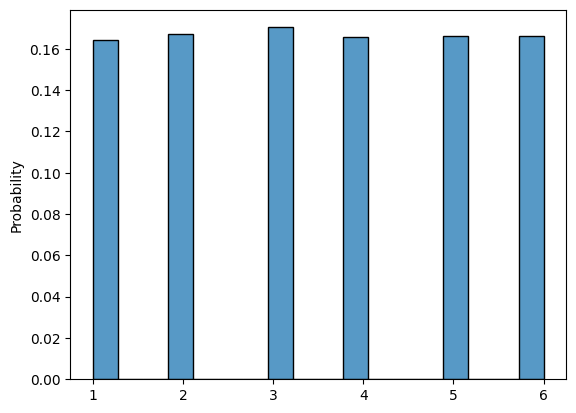

In [ ]:
sns.histplot(np.random.randint(1, 7, size=10000), stat='probability');

In [ ]:
u = (np.random.poisson(5, size=1000))

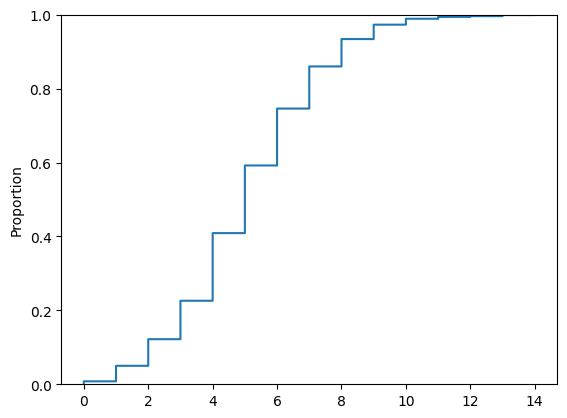

In [ ]:
# Используем ecdf

sns_plot = sns.ecdfplot(u);

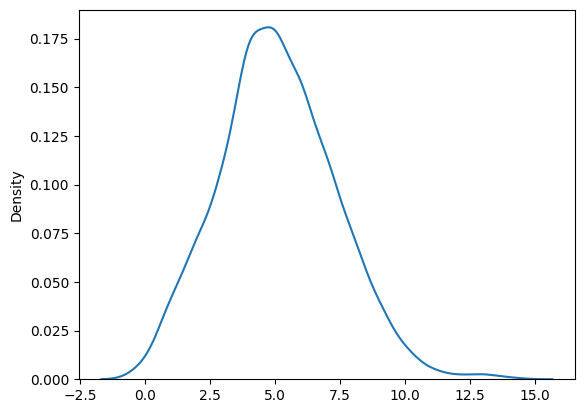

In [ ]:
# PDF(PMF) -> производная от CDF

sns.kdeplot(u);

<a name="ЗБЧ_и_ЦПТ"></a>

## Урок №3 - ЗБЧ и ЦПТ

[Оглавление](#оглавление)

In [ ]:
# Импорт нужных нам в этом уроке библиотек

import pandas as pd
import numpy as np

import seaborn as sns

import pylab
import scipy.stats as stats


### ЗБЧ

In [ ]:
# Берём кубик

np.random.randint(1, 7)

3

In [ ]:
dice = pd.Series([1, 2, 3, 4, 5, 6])

dice

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

In [ ]:
# Серия из бросков кубика

np.random.randint(1, 7, size=10)

# С помощью sample будем эмулировать генератор

array([4, 4, 4, 4, 3, 3, 6, 6, 3, 4])

In [ ]:
# Обычное усреднение по выборке
print('Результат обычного усреднения по выборке = {}'.format(dice.mean()))
print()
print('Результат усреднения по выборке из 100000 элементов = {}'.format(dice.sample(100000, replace=True).mean()))

Результат обычного усреднения по выборке = 3.5

Результат усреднения по выборке из 100000 элементов = 3.50157


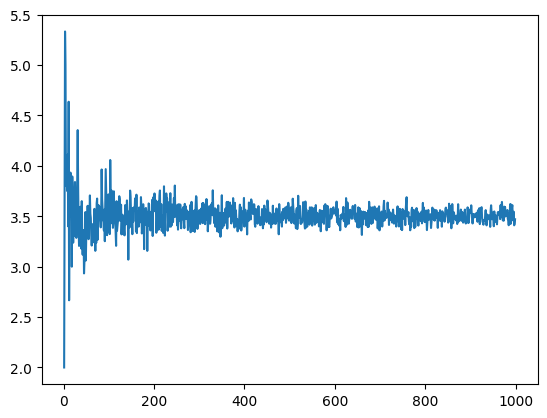

In [ ]:
# Визуализация сходимости

result = []
for i in range(1000):
  result.append(dice.sample(i, replace=True).mean())


pd.Series(result).plot();

,0,cum_sum,sample_size,mean
0,4,4,1,4.0
1,6,10,2,5.0
2,2,12,3,4.0
3,4,16,4,4.0
4,2,18,5,3.6


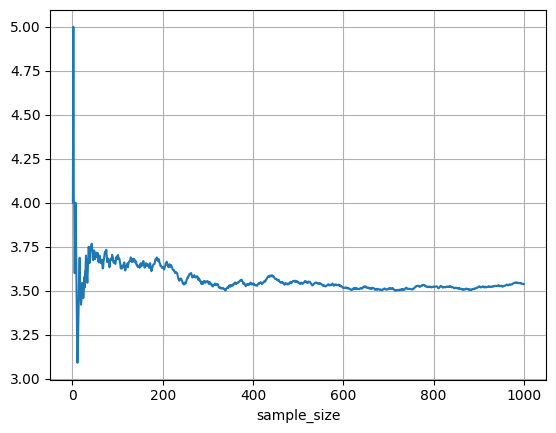

In [ ]:
# Хотим красивую виузализацию с помощью dataframe

df = dice.sample(1000, replace=True).to_frame().reset_index(drop=True)
df['cum_sum'] = df.cumsum()
df['sample_size'] = range(1, 1001)
df['mean'] = df['cum_sum'] / df['sample_size']
df.set_index('sample_size')['mean'].plot(grid=True)

df.head()

#### Нормальное

,0,cum_sum,sample_size,mean
0,-0.420453,-0.420453,1,-0.420453
1,-1.215782,-1.636235,2,-0.818118
2,0.842068,-0.794167,3,-0.264722
3,-0.137283,-0.931449,4,-0.232862
4,0.886313,-0.045137,5,-0.009027


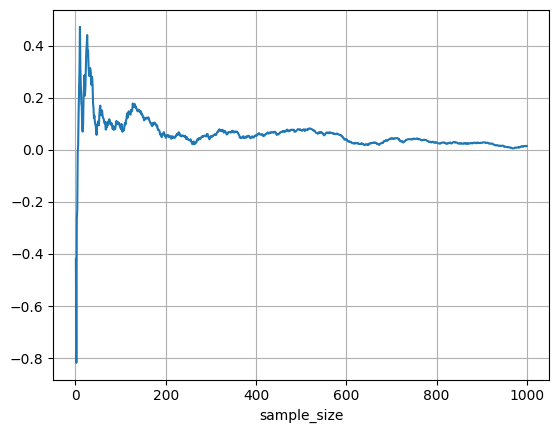

In [ ]:
# Хотим красивую виузализацию с помощью dataframe

df = pd.DataFrame(np.random.normal(size=1000))
df['cum_sum'] = df.cumsum()
df['sample_size'] = range(1, 1001)
df['mean'] = df['cum_sum'] / df['sample_size']
df.set_index('sample_size')['mean'].plot(grid=True)

df.head()

#### Равномерное

,0,cum_sum,sample_size,mean
0,0.762575,0.762575,1,0.762575
1,0.403820,1.166395,2,0.583197
2,0.200558,1.366953,3,0.455651
3,0.860349,2.227302,4,0.556826
4,0.645847,2.873149,5,0.574630


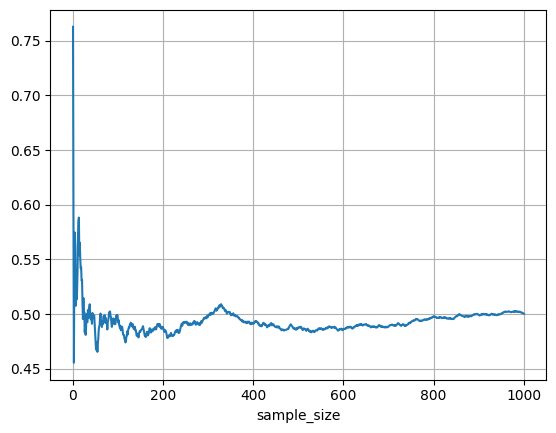

In [ ]:
# Хотим красивую виузализацию с помощью dataframe

df = pd.DataFrame(np.random.uniform(size=1000))
df['cum_sum'] = df.cumsum()
df['sample_size'] = range(1, 1001)
df['mean'] = df['cum_sum'] / df['sample_size']
df.set_index('sample_size')['mean'].plot(grid=True)

df.head()

<Axes: >

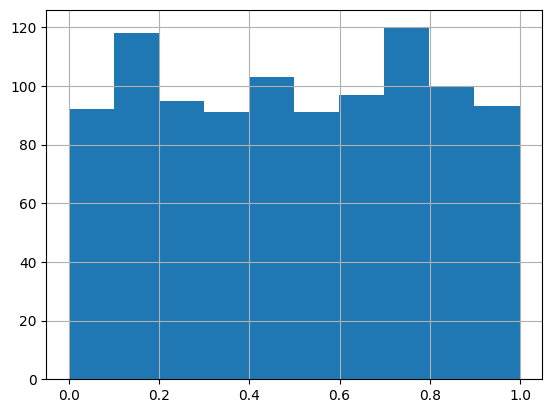

In [ ]:
df[0].hist()

#### Логнормальное

,0,cum_sum,sample_size,mean
0,3.145050,3.145050,1,3.145050
1,1.637796,4.782846,2,2.391423
2,6.578182,11.361027,3,3.787009
3,0.525116,11.886144,4,2.971536
4,1.528753,13.414896,5,2.682979


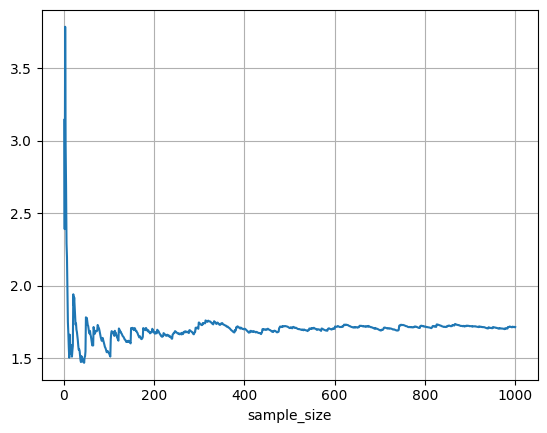

In [ ]:
# Хотим красивую виузализацию с помощью dataframe

df = pd.DataFrame(np.random.lognormal(size=1000))
df['cum_sum'] = df.cumsum()
df['sample_size'] = range(1, 1001)
df['mean'] = df['cum_sum'] / df['sample_size']
df.set_index('sample_size')['mean'].plot(grid=True)

df.head()

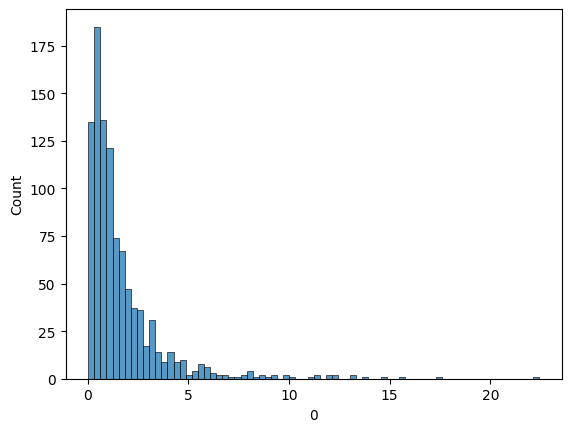

In [ ]:
sns.histplot(df[0]);

### Центральная предельная теорема (ЦПТ)

In [ ]:
dice

0    1
1    2
2    3
3    4
4    5
5    6
dtype: int64

<Axes: ylabel='Count'>

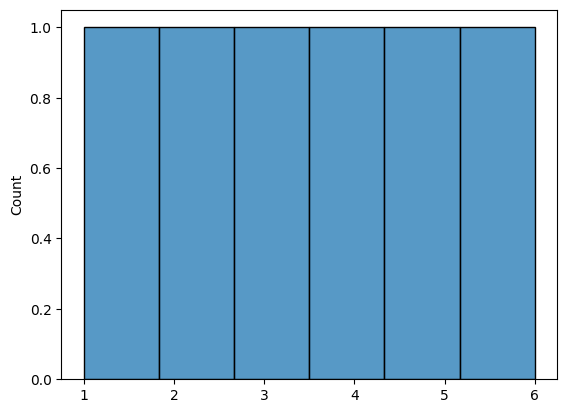

In [ ]:
sns.histplot(dice, bins=6);

Попробуем перебирать размеры выборок и посмотрим на получившиеся распределения

Выборка из 10 элементов

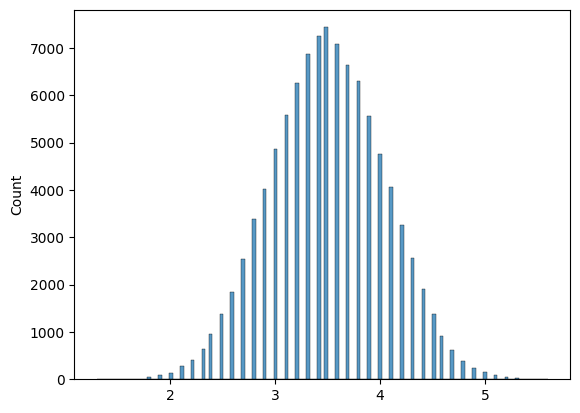

In [ ]:
# Генерируем выборку
data = [dice.sample(10, replace=True).mean() for _ in range(100000)]

# Рисуем гистограмму
sns.histplot(data);

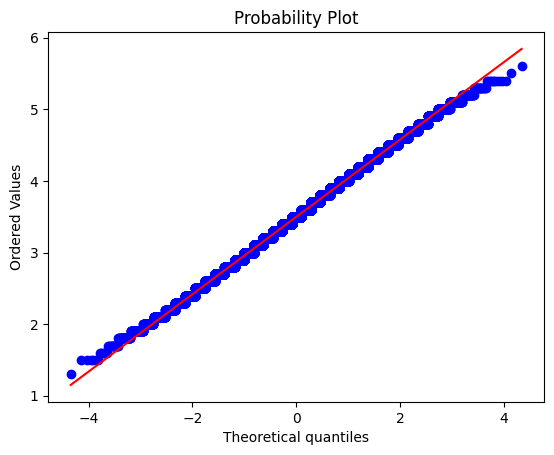

In [ ]:
stats.probplot(data, dist="norm", plot=pylab)
pylab.show();

Выборка из 100 элементов

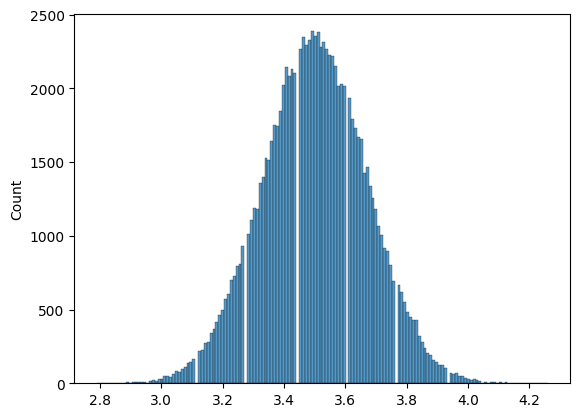

In [ ]:
# Генерируем выборку
data = [dice.sample(100, replace=True).mean() for _ in range(100000)]

# Рисуем гистограмму
sns.histplot(data);

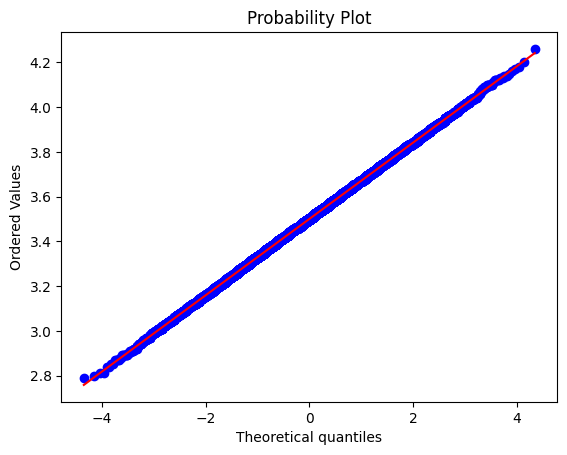

In [ ]:
stats.probplot(data, dist="norm", plot=pylab)
pylab.show();

Выборка из 1000 элементов

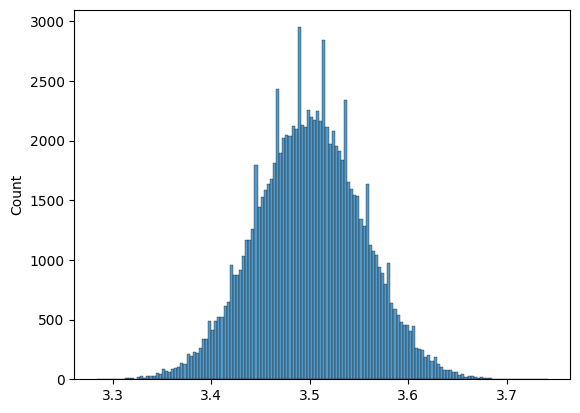

In [ ]:
# Генерируем выборку
data = [dice.sample(1000, replace=True).mean() for _ in range(100000)]

# Рисуем гистограмму
sns.histplot(data);

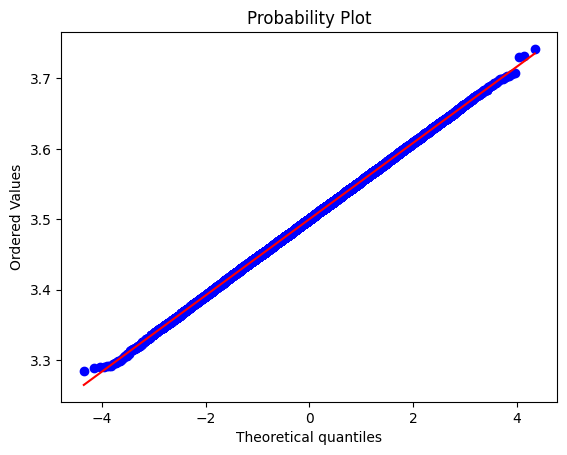

In [ ]:
stats.probplot(data, dist="norm", plot=pylab)
pylab.show();

Мы видим что при увеличении выбоки у нас уменьшиется разброс значений

Докажем это с помощью визуализации
Стандартного отклонения и квадратного корня

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
result = []
for n in tqdm(range(1,100)):
  result.append(pd.Series([dice.sample(n,replace=True).mean() for _ in range(1000)]).std())

  0%|          | 0/99 [00:00<?, ?it/s]

<Axes: >

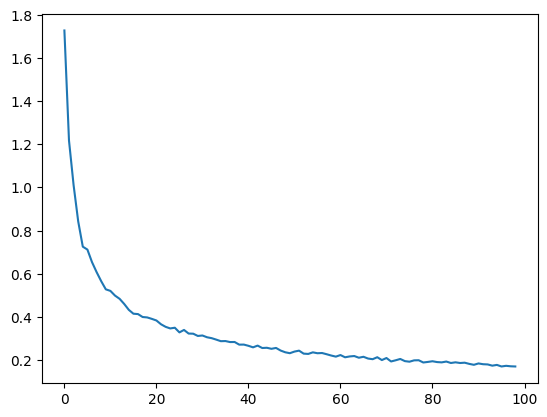

In [ ]:
pd.Series(result).plot()

<ipython-input-51-869917bcd704>:1: RuntimeWarning: divide by zero encountered in divide
  pd.Series(1/np.sqrt(range(100))).plot()


<Axes: >

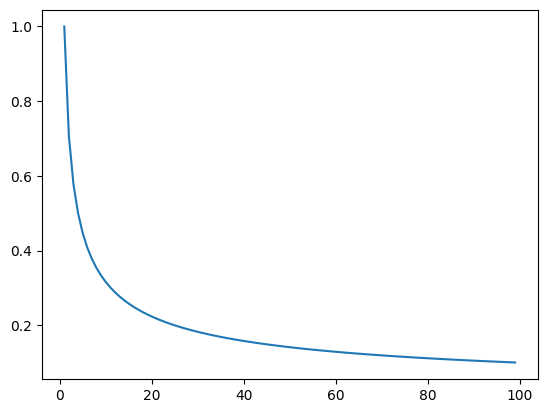

In [ ]:
pd.Series(1/np.sqrt(range(100))).plot()

<a name="Монте-Карло_практика"></a>

## Урок №4 - Монте-Карло: практика

[Оглавление](#оглавление)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
dice = pd.Series([1, 2, 3, 4, 5, 6])

dice.sample(1).values[0]

2

In [ ]:
rolls = [dice.sample(1).values[0] for _ in range(10000)]

rolls[:10]

[2, 2, 2, 4, 2, 5, 3, 6, 2, 3]

In [ ]:
# Оцениваем вероятность кубика

pd.Series(rolls).value_counts(normalize=True)

3    0.1716
5    0.1700
6    0.1657
4    0.1651
1    0.1641
2    0.1635
Name: proportion, dtype: float64

### Задача № 1
Определить вероятность того, что в группе состоящей из 23 человек, у двух людей будет совпадение дней рождения (число и месяц)

In [ ]:
# Выдадим каждому дню в году ссвой Id

bd = pd.Series(range(365))

In [ ]:
# Генератор комнаты

room = bd.sample(23, replace=True)
room.duplicated().max()

False

In [ ]:
# Генерируем 10 000 комнат

rooms = [bd.sample(23, replace=True).duplicated().max() for _ in range(10000)]

In [ ]:
#  Высчитыввем среднее по всем комнатам (Для дублирующихся зачений 1, для отсутствующих дубликатов - 0)

np.mean(rooms)

# Тогда для 23 человек вероятность бдует 50%

0.5158

### Задача № 2
Экзамен проходит по следующей схеме: если некоторый билет уже был вытянут, то после ответа экзаменатор откладывает его в сторону. Студент выучил 20 билетов из 30. Когда ему выгоднее идти, первым или вторым, чтобы вероятность вынуть выученный билет была больше?

In [ ]:
# 30 билетов котоыре существуют
tickets = list(range(1, 31))

#  20 билетов которые выучил студент
students = list(range(1, 21))

In [ ]:
# Импортируем библиотеку для перемешивания билетов
from random import shuffle

# Перемешиваем билеты
shuffle(tickets)

In [ ]:
shuffle(tickets)

tickets

[4,
 8,
 29,
 2,
 7,
 23,
 12,
 20,
 14,
 28,
 25,
 24,
 19,
 26,
 6,
 22,
 5,
 17,
 1,
 16,
 30,
 21,
 11,
 3,
 27,
 18,
 9,
 13,
 10,
 15]

In [ ]:
n = 10000
student = list(range(1, 21))
tickets = list(range(1, 31))

result = []

for _ in range(n):
  shuffle(tickets)
  result.append(tickets[0] in student)

print("Вероятность удачной сдачи экзамена, если студент пойдёт первым, будет - {}".format(np.mean(result)))

Вероятность удачной сдачи экзамена, если студент пойдёт первым, будет - 0.6571


In [ ]:
n = 10000
student = list(range(1, 21))
tickets = list(range(1, 31))

result = []

for _ in range(n):
  shuffle(tickets)
  result.append(tickets[1] in student)

print("Вероятность удачной сдачи экзамена, если студент пойдёт вторым, будет - {}".format(np.mean(result)))

Вероятность удачной сдачи экзамена, если студент пойдёт вторым, будет - 0.6714


### Задача № 3
Ночью произошло ДТП с участием такси. В городе работают две компании такси — «Синие» и «Зелёные». «Зелёным» принадлежит 85% такси, «Синим» 15%. Свидетель аварии утверждает, что такси принадлежало «Синим». Следственный эксперимент показал, что ночью свидетель верно определяет цвет такси в 80%. Какова вероятность того, что такси действительно принадлежало «Синим»?

In [ ]:
# Генератор для цвета машины

np.random.binomial(1, 0.15)

# 0 - зелёная машина
# 1 - синяя машина

0

In [ ]:
# Функция свидетеля

def witness(taxi):
  # В 80% говорит правду
  if np.random.binomial(1, 0.8):
    return taxi
  # В 20% ошибается
  return abs(taxi - 1)



# Вызов функции
witness(0)

0

In [ ]:
n = 10000
result = []

for _ in range(n):
  taxi = np.random.binomial(1, 0.15)
  witness_answer = witness(taxi)
  result.append((taxi, witness_answer))

#  Создаём датафрейм содержащий реальный результат и ответ свидетеля
df = pd.DataFrame(result, columns = ['taxi', 'witness_answer'])

In [ ]:
df

,taxi,witness_answer
0,0,0
1,0,1
2,0,1
3,0,0
4,1,1
...,...,...
9995,0,1
9996,0,1
9997,1,1
9998,1,1


In [ ]:
#  Считаем долю правильных овтетов
df.groupby('witness_answer')['taxi'].mean()

# Тауим образом мы получаем что с вероятностью в 41% такси синее

witness_answer
0    0.043533
1    0.416811
Name: taxi, dtype: float64

### Задача № 4
Русская рулетка. Есть револьвер с 2 вставленными подряд патронами. Первый крутит барабан и стреляет и остается жив. Твоя очередь: тебе предлагает покрутить барабан перед выстрелом. Согласишься или сразу выстрелишь и почему?

In [ ]:
#  Моделируем барабан

chamber = [1, 1, 0, 0, 0, 0]

In [ ]:
# Функция для поворота брабана

def one_turn(chamber):
  new_chamber = [0, 0, 0, 0, 0, 0]
  n = len(chamber)
  for i in range(n):
    if i < n-1:
      new_chamber[i+1] = chamber[i]
    else:
      new_chamber[0] = chamber[i]
  return new_chamber

In [ ]:
one_turn(one_turn(one_turn(one_turn(one_turn(one_turn(chamber))))))

[1, 1, 0, 0, 0, 0]

In [ ]:
def spin_chamber(chamber):
  n = np.random.randint(1, 7)
  for i in range(n):
    chamber = one_turn(chamber)
  return chamber

In [ ]:
pd.Series([spin_chamber(chamber) for _ in range(10000)]).value_counts(normalize=True)

[1, 0, 0, 0, 0, 1]    0.1712
[0, 0, 0, 0, 1, 1]    0.1704
[1, 1, 0, 0, 0, 0]    0.1684
[0, 1, 1, 0, 0, 0]    0.1643
[0, 0, 1, 1, 0, 0]    0.1642
[0, 0, 0, 1, 1, 0]    0.1615
Name: proportion, dtype: float64

In [ ]:
# Заряжаем револьвер
chamber = [1, 1, 0, 0, 0, 0]

# Первый игрок крутит барабан
chamber = spin_chamber(chamber)

# Первый игрок стреляет
chamber = one_turn(chamber)
p1 = chamber[0]
chamber[0] = 0     # Произошёл выстрел

# Второй игрок вращает барабан
chamber = spin_chamber(chamber)

# Второй игрок стреляет
chamber = one_turn(chamber)
p2 = chamber[0]

In [ ]:
print("Результат эксперимента")
print("Первый игрок {}".format(p1))
print("Второй игрок {}".format(p2))

Результат эксперимента
Первый игрок 0
Второй игрок 0


In [ ]:
# Проведём серию экспериментов и посмотрим на результаты

n = 10000
result = []

for _ in range(n):
  # Заряжаем револьвер
  chamber = [1, 1, 0, 0, 0, 0]

  # Первый игрок крутит барабан
  chamber = spin_chamber(chamber)

  # Первый игрок стреляет
  chamber = one_turn(chamber)
  p1 = chamber[0]
  chamber[0] = 0     # Произошёл выстрел

  # Второй игрок вращает барабан
  chamber = spin_chamber(chamber)

  # Второй игрок стреляет
  chamber = one_turn(chamber)
  p2 = chamber[0]

  result.append((p1, p2))

In [ ]:
t = pd.DataFrame(result, columns=['p1', 'p2'])

t.head()

,p1,p2
0,0,1
1,0,1
2,0,0
3,0,1
4,1,0


In [ ]:
t.groupby('p1')['p2'].agg(['count', 'mean'])

,count,mean
p1,,
0,6654,0.334536
1,3346,0.177227


In [ ]:
# Рассчитаем вероятность, при условии того, что
# второй игрок дополнительно не будет вращать барабан

# Проведём серию экспериментов и посмотрим на результаты

n = 10000
result = []

for _ in range(n):
  # Заряжаем револьвер
  chamber = [1, 1, 0, 0, 0, 0]

  # Первый игрок крутит барабан
  chamber = spin_chamber(chamber)

  # Первый игрок стреляет
  chamber = one_turn(chamber)
  p1 = chamber[0]
  chamber[0] = 0     # Произошёл выстрел

  # # Второй игрок вращает барабан
  # chamber = spin_chamber(chamber)

  # Второй игрок стреляет
  chamber = one_turn(chamber)
  p2 = chamber[0]

  result.append((p1, p2))

In [ ]:
t = pd.DataFrame(result, columns=['p1', 'p2'])

t.groupby('p1')['p2'].agg(['count', 'mean'])

,count,mean
p1,,
0,6670,0.250075
1,3330,0.507207


<a name="p-value"></a>

## Урок №5 - Проверка гипотез и p-value

[Оглавление](#оглавление)

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns

# Библиотека для визуализации процедуры цикла
from tqdm.notebook import tqdm

Менеджер Виноградного Дня утверждает что 80% клиентов удовлетворены напитком. Мы опросили 100 человек. 75 довольны. Какой вывод мы можем сделать?

**Нулевая гипотеза**

Допустим что удовлетворенность равна 80%. Какова при этом вероятность получить удовлетворенность 75% и ниже при выборке в 100 человек?

Тогда

*Нулевая гипотеза*
H0: удовлетворённость == 80%

*Альтернативная гипотеза*
H1: удовлетворённость  < 80%

In [ ]:
# Делаем обычный генератор

np.random.binomial(1, 0.8, size=100).mean()

0.8

In [ ]:
# Проверяем нашу гипотезу с помощью созданного генератора

np.random.binomial(1, 0.8, size=100).mean() <= 0.75

False

In [ ]:
# Используем выборку из 10 проверок

np.mean([np.random.binomial(1, 0.8, size=100).mean() <= 0.75 for _ in range(10)])

0.1

**p-value**

по факту это вероятность (уровень) от которого мы говорим, что наша теория не работает
( те мы считаем % удовлетворённости для нашей выборки )

 - ВАЖНО данный пример рассматривает только односторонюю проверку

In [ ]:
# Увеличим выборку и посмотри на результаты

np.mean([np.random.binomial(1, 0.8, size=100).mean() <= 0.75 for _ in range(1000)])

0.121

Важно помнить, что рассчет p-value аналогичен bootstrap

In [ ]:
# Используем готовый тест из коробки, чтобы проверить схожесть нашего теста

from statsmodels.stats.proportion import proportions_ztest

proportions_ztest(75, 100, value=0.8, alternative='smaller')

(-1.1547005383792526, 0.12410653949496159)

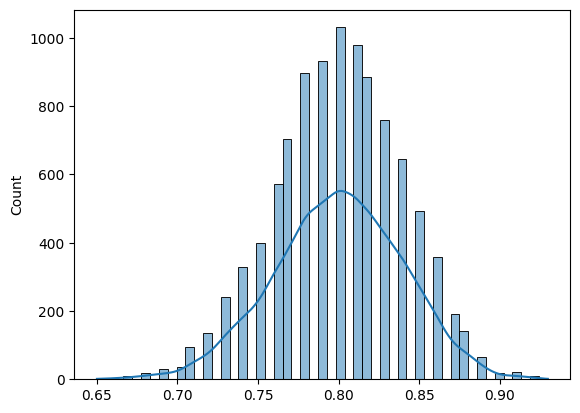

In [ ]:
sns.histplot([np.random.binomial(1, 0.8, size=100).mean() for _ in range(10000)], kde=True);

Конверсия на текущем лендинге составляет 10%

Покажем новый лендинг только 30% клиентам

In [ ]:
df = pd.DataFrame({'group':['old landing (A)', 'new landing (B)'],  # 2 лендинга А/В
                   'lead':[700, 300],                               # Трафик пользователей
                   'sale':[70, 48]})                                # Колл-во продаж

df

,group,lead,sale
0,old landing (A),700,70
1,new landing (B),300,48


In [ ]:
# client rate
df['cr'] = df['sale'] / df['lead']

df

,group,lead,sale,cr
0,old landing (A),700,70,0.10
1,new landing (B),300,48,0.16


Допустим, что никакой разницы нет. какова вероятность получить такие же и большие различия при том, что никокй разницы нет?

(нулевая гипотеза)

In [ ]:
# Все измерения смешали в кучу

(70 + 48) / 1000

0.118

In [ ]:
# Формируем два генератора

# Первый генератор для А
np.random.binomial(1, 0.118, size=700).mean()

0.11714285714285715

In [ ]:
# Второй генератор для B
np.random.binomial(1, 0.118, size=300).mean()

0.11333333333333333

In [ ]:
#  Смотрим разницу между нашим усреднённым значением, двух генераторов

np.random.binomial(1, 0.118, size=300).mean() - np.random.binomial(1, 0.118, size=700).mean()

0.013333333333333336

In [ ]:
# Так же посмотрим модульную разницу

abs(np.random.binomial(1, 0.118, size=300).mean() - np.random.binomial(1, 0.118, size=700).mean())

0.015714285714285722

In [ ]:
#  Посмотрим разницу между нашими предположениями

abs(0.1 - 0.16)

0.06

In [ ]:
# Посмотрим в каких случаях вероятность разниц
# сгенерированных выборок будет больше или равна чем наше предположение

np.mean([abs(np.random.binomial(1,0.118,size=300).mean()
- np.random.binomial(1,0.118,size=700).mean()) >= 0.06 for _ in range(10000)])

0.0073

In [ ]:
# Проверим получившееся занчение с помощью математического расчёта

proportions_ztest([70,48],[700,300])

(-2.695166510284625, 0.007035346384355496)

### Уровень значимости

(обычно принимается на 0.05)

In [ ]:
n = 1000
result = []

for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.118,size=700)
  b = np.random.binomial(1,0.118,size=300)

  diff = abs(a.mean() - b.mean())

  null_prob = np.concatenate([a, b]).mean()

  p_val = np.mean([abs(np.random.binomial(1, null_prob, size=300).mean()
  - np.random.binomial(1, null_prob, size=700).mean()) >= diff for _ in range(1000)])

  result.append(p_val)

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: ylabel='Count'>

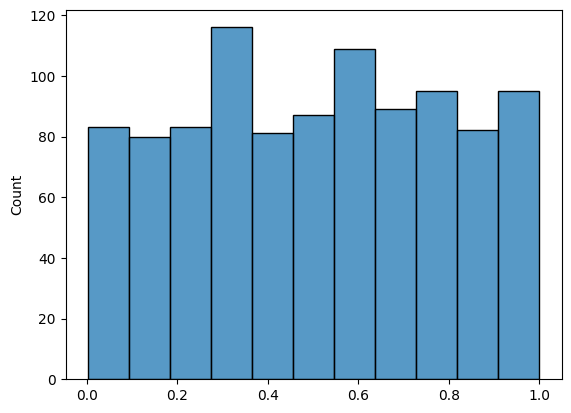

In [ ]:
# Построим результат распредления

sns.histplot(result)

In [ ]:
# Вычислим сколько будет чисел меньших чем 0.05

(np.array(result) < 0.05).mean()

0.048

array([[<Axes: title={'center': '0'}>]], dtype=object)

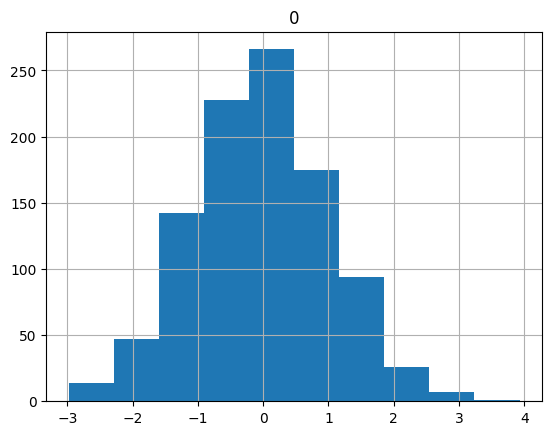

In [ ]:
# Формируем нормальное распределение
df = pd.DataFrame(np.random.normal(size=1000))

df.hist()

<Axes: >

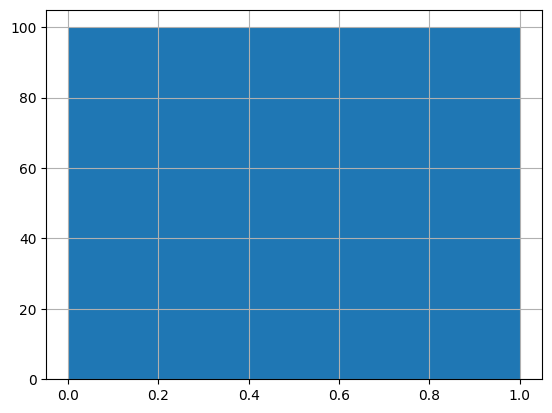

In [ ]:
# Сортируем значения
df = df.sort_values(0)
# Вычисляем p-value
df['cnt'] = range(1,1001)
df['pct'] = df['cnt'] / 1000
df['pct'].hist()

In [ ]:
# Разобьём данные на группы
df['bin'] = pd.cut(df['pct'],10)

df.groupby('bin')['pct'].count()

bin
(1e-06, 0.101]    100
(0.101, 0.201]    100
(0.201, 0.301]    100
(0.301, 0.401]    100
(0.401, 0.5]      100
(0.5, 0.6]        100
(0.6, 0.7]        100
(0.7, 0.8]        100
(0.8, 0.9]        100
(0.9, 1.0]        100
Name: pct, dtype: int64

In [ ]:
# Теперь сфоримруем выборки с различными вероятностями
n = 1000
result = []

for _ in tqdm(range(n)):
  # Выборка А
  a = np.random.binomial(1,0.10,size=700)
  # Выборка В
  b = np.random.binomial(1,0.12,size=300)

  diff = abs(a.mean() - b.mean())

  null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,null_hyp_prob,size=300).mean()
  - np.random.binomial(1,null_hyp_prob,size=700).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: >

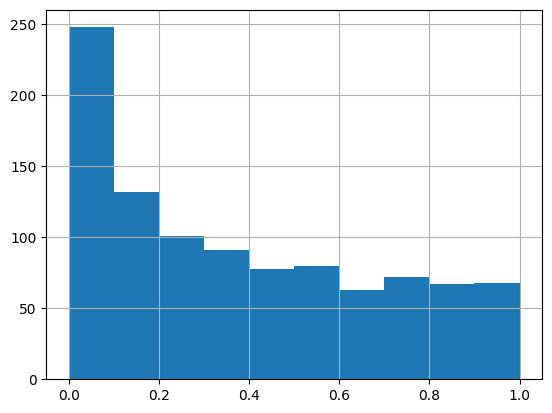

In [ ]:
pd.Series(result).hist()

In [ ]:
(pd.Series(result) < 0.05).mean()

0.168

In [ ]:
n = 1000
result = []
for _ in tqdm(range(n)):
  a = np.random.binomial(1,0.10,size=700)
  b = np.random.binomial(1,0.15,size=300)
  diff = abs(a.mean() - b.mean())
  null_hyp_prob = np.concatenate([a,b]).mean()
  pval = np.mean([abs(np.random.binomial(1,null_hyp_prob,size=300).mean()
  - np.random.binomial(1,null_hyp_prob,size=700).mean()) >= diff for _ in range(1000)])
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
(pd.Series(result) < 0.05).mean()

0.599

<a name="A|B_prop"></a>

## Урок №6 - А/Б тесты: пропорции

[Оглавление](#оглавление)

In [ ]:
# Импорт библиотек

import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.metrics import classification_report

from tqdm.notebook import tqdm

In [ ]:
# minimal detect effect
mde = 0.05

# baseline
baseline = 0.2

# По мнению сайта для приведённых выше значений
# https://www.evanmiller.org/ab-testing/sample-size.html
sample_size = 1030

In [ ]:
np.random.binomial(1, baseline, size=sample_size).mean()

0.20679611650485438

In [ ]:
np.random.binomial(1, baseline + mde, size=sample_size).mean()

0.24854368932038834

Какие тесты мы можем проводить для такого распределения

Fisher exact test  
Z test  
T test  
Chi square test  
Bootstrap (Monte-Carlo)  


In [ ]:
# Импортируем proportion Z test
from statsmodels.stats.proportion import proportions_ztest
# t-test + критерий Манна
from scipy.stats import ttest_ind, mannwhitneyu

Выдвигаем нулевую гипотизу

H0: разница между группами нет == выборки пришли из одного распределения

In [ ]:
result = []

for _ in tqdm(range(10000)):
  # Генерируем выборки
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)

  # Используем Z тест
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

<Axes: >

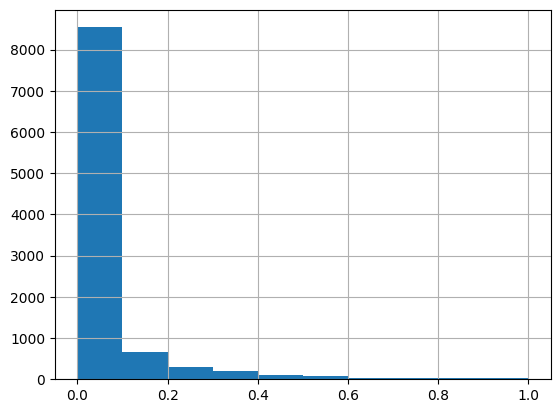

In [ ]:
# Преобразовываем данные в Series
t = pd.Series(result)

t.hist()

In [ ]:
# Считаем мощность
(t < 0.05).mean()

0.7732

In [ ]:
# Проверяем другие тесты

result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

t = pd.Series(result)

(t < 0.05).mean()

  0%|          | 0/10000 [00:00<?, ?it/s]

0.7729

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = mannwhitneyu(a,b)
  result.append(pval)

t = pd.Series(result)

(t < 0.05).mean()

  0%|          | 0/10000 [00:00<?, ?it/s]

0.7717

Одинаковые вероятности на разных тестах

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = mannwhitneyu(a,b)
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

<Axes: >

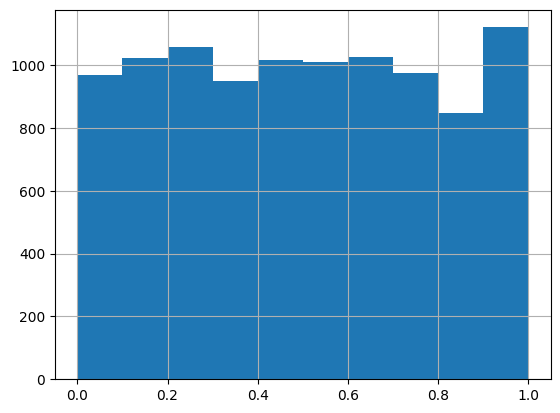

In [ ]:
t = pd.Series(result)
t.hist()


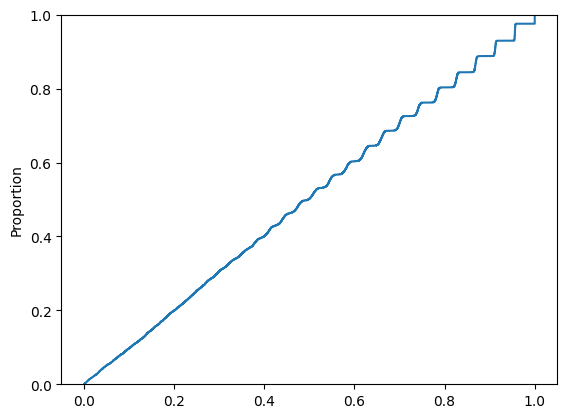

In [ ]:
sns.ecdfplot(t);

In [ ]:
(t < 0.05).mean()

0.0505

Z test

  0%|          | 0/10000 [00:00<?, ?it/s]

<Axes: >

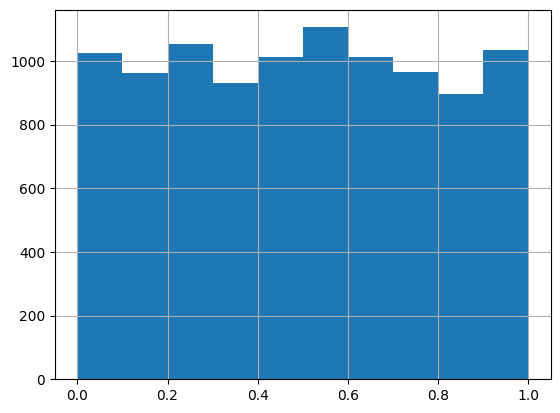

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

t = pd.Series(result)
t.hist()

<Axes: ylabel='Proportion'>

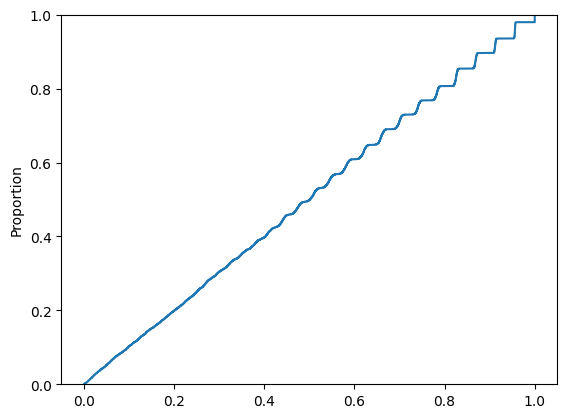

In [ ]:
sns.ecdfplot(t)

In [ ]:
(t < 0.05).mean()

0.0519

### Рассчёт сэмпла в питоне

In [ ]:
import statsmodels.stats.api as sms

# Герерирование данных + расчёт размера выборки
es = sms.proportion_effectsize(0.20, 0.25)
sample_size = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1))

In [ ]:
sample_size

1092

In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/10000 [00:00<?, ?it/s]

0.8054

Отнощение контроля к тесту 1/3

In [ ]:
es = sms.proportion_effectsize(0.20, 0.25)
sample_size1 = round(sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1/3))

In [ ]:
print('Первая группа - ', sample_size1)

sample_size2 = round(sample_size1 * 1/3)
print('Вторая группа - ', sample_size2)

Первая группа -  2184
Вторая группа -  728


In [ ]:
result = []
for _ in tqdm(range(10000)):
  a = np.random.binomial(1,baseline,size=sample_size1)
  b = np.random.binomial(1,baseline + mde,size=sample_size2)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

# Проверяем получилось ли нам достигнуть необходимю мощность (80%)
t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/10000 [00:00<?, ?it/s]

0.8089

Попробуем подобрать необходиме число выборок

In [ ]:
sample_size = 1000

baseline = 0.3
mde = 0.02
result = []

for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

0.178

In [ ]:
sample_size = 6000

baseline = 0.3
mde = 0.02
result = []

for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

0.665

In [ ]:
sample_size = 8000

baseline = 0.3
mde = 0.02
result = []

for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append(pval)

t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

0.794

По итогу объём выборки будет больше 8000

In [ ]:
es = sms.proportion_effectsize(0.30, 0.32)
sms.NormalIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

8392.38536140766

Сгенерируем эксперимент, в котором мы изначально проставляем класс 1 всем элементам

In [ ]:
sample_size = 8393
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline + mde,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append((1,pval))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

t['y_pred'] = (t['y_score'] < 0.05)*1

t

,y_true,y_score,y_pred
0,1,0.001046,1
1,1,0.001939,1
2,1,0.001576,1
3,1,0.000144,1
4,1,0.000260,1
...,...,...,...
995,1,0.001517,1
996,1,0.001265,1
997,1,0.042752,1
998,1,0.009299,1


In [ ]:
t['y_pred'].mean()

# Мы получили мощность в 80%

0.786

Теперь сгенерируем аналогичный тест, но для него проставляем 0й класс

In [ ]:
sample_size = 5562
baseline = 0.3
mde = 0.02
result = []
for _ in tqdm(range(1000)):
  a = np.random.binomial(1,baseline,size=sample_size)
  b = np.random.binomial(1,baseline,size=sample_size)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
  result.append((0,pval))

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

t['y_pred'] = (t['y_score'] < 0.05)*1

t

,y_true,y_score,y_pred
0,0,0.771478,0
1,0,0.443949,0
2,0,0.851590,0
3,0,0.523155,0
4,0,0.396592,0
...,...,...,...
995,0,0.496204,0
996,0,0.564174,0
997,0,0.565758,0
998,0,0.234291,0


In [ ]:
t['y_pred'].mean()

# Мы получили альфу в 5%

0.045

### Смоделируем дисбаланс класса


Искусственно уменьшим 1й класс

In [ ]:
# Дисбаланс класса в 30%
class_balance = 0.3

sample_size = 1090
baseline = 0.2
mde = 0.05
result = []

for _ in tqdm(range(10000)):
  if np.random.binomial(1,class_balance):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((0,pval))
  else:
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((1,pval))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

t['y_pred'] = (t['y_score'] < 0.05)*1

t

,y_true,y_score,y_pred
0,1,6.224540e-04,1
1,1,1.581156e-02,1
2,1,6.957008e-04,1
3,1,1.054716e-03,1
4,0,2.825552e-01,0
...,...,...,...
9995,1,3.624112e-04,1
9996,1,5.454167e-02,0
9997,0,8.283396e-01,0
9998,1,5.338129e-07,1


In [ ]:
t['y_pred'].mean()

0.5775

In [ ]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.67      0.95      0.79      2996
           1       0.97      0.80      0.88      7004

    accuracy                           0.85     10000
   macro avg       0.82      0.88      0.83     10000
weighted avg       0.88      0.85      0.85     10000



In [ ]:
# Считаем precision

t[t['y_pred'] == 1]['y_true'].mean()

0.9733333333333334

Теперь увеличим 1й класс

In [ ]:
# Дисбаланс класса в 90%
class_balance = 0.9

sample_size = 1090
baseline = 0.2
mde = 0.05
result = []

for _ in tqdm(range(10000)):
  if np.random.binomial(1,class_balance):
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((0,pval))
  else:
    a = np.random.binomial(1,baseline,size=sample_size)
    b = np.random.binomial(1,baseline + mde,size=sample_size)
    _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)])
    result.append((1,pval))

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.DataFrame(result,columns=['y_true','y_score'])

t['y_pred'] = (t['y_score'] < 0.05)*1

t

,y_true,y_score,y_pred
0,0,0.282555,0
1,0,0.124828,0
2,0,0.257091,0
3,0,0.107595,0
4,0,0.421481,0
...,...,...,...
9995,0,0.616764,0
9996,0,0.065319,0
9997,0,0.444587,0
9998,0,0.184036,0


In [ ]:
t['y_pred'].mean()

0.1235

In [ ]:
print(classification_report(t['y_true'],t['y_pred']))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      9037
           1       0.62      0.79      0.70       963

    accuracy                           0.93     10000
   macro avg       0.80      0.87      0.83     10000
weighted avg       0.94      0.93      0.94     10000



In [ ]:
# Считаем precision

t[t['y_pred'] == 1]['y_true'].mean()

0.6194331983805668

In [ ]:
# Вывод
# При наличии дисбаланса класса, мы можем получить высокое значение мощности (recall), но угадывать верное значение мы будем в 50% (precision)

<a name="A|B_cont"></a>

## Урок №7 - А/Б тесты: непрерывные переменные

[Оглавление](#оглавление)

In [ ]:
# Импорт библиотек

import pandas as pd
import numpy as np
from tqdm.notebook import tqdm

# Импорт t test
from scipy.stats import ttest_ind

# qq график
import pylab
import scipy.stats as stats

import statsmodels.stats.api as sms

# Импорт U-критерий Манна — Уитни
from scipy.stats import mannwhitneyu

''

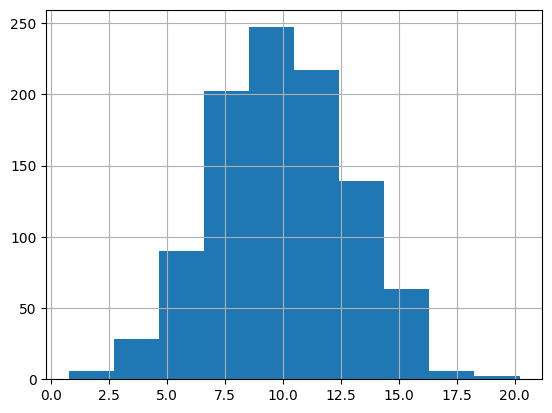

In [ ]:
# Генерируем первую выборку

pd.Series(np.random.normal(10,3,size=1000)).hist()
;

''

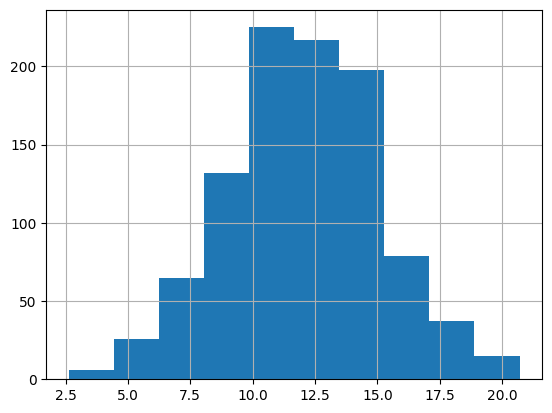

In [ ]:
# Вторая выборка будет сдвинута по среднему значению

pd.Series(np.random.normal(12,3,size=1000)).hist()
;

In [ ]:
# Пытаемся угадать размер необходимой выборки
baseline = 10
mde = 2
result = []
n = 10000

# Меняем эту переменую
sample_size = 36


for _ in tqdm(range(n)):
  a = np.random.normal(baseline,3,size=sample_size)
  b = np.random.normal(baseline + mde,3,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)

# Рассчитываем мощность
(t < 0.05).mean()

0.7965

### Проверим как распредлено выборочное среднее (Проверяем можно ли применить t-test 1й способ)

In [ ]:
t = pd.Series([np.random.normal(10, 3, size=36).mean() for _ in range(1000)])

<Axes: >

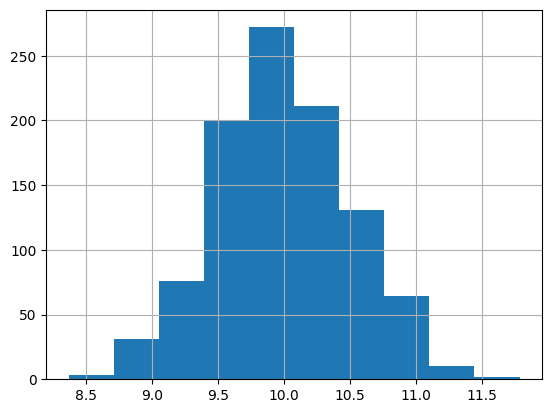

In [ ]:
t.hist()

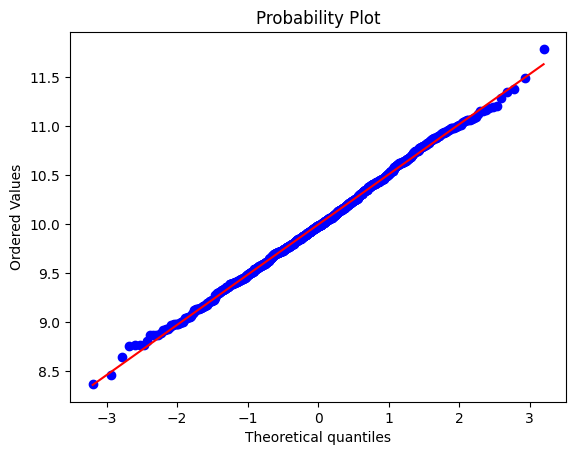

In [ ]:
# В ячейке выше мы получили распределение с помощью qq графика проверим
# Действительно ли мы работаем с нормальным распределением?

stats.probplot(t, dist="norm", plot=pylab)
pylab.show()

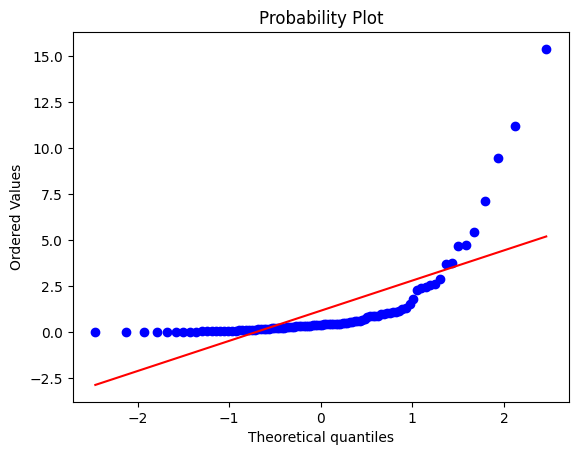

In [ ]:
# Удостоверимся что нас не обманывают и подставим в график распределение парето

t = pd.Series(np.random.pareto(2,size=100))

stats.probplot(t, dist="norm", plot=pylab)
pylab.show()

### Другой сопособ проверить пригодность теста

Удаляем mde из выборок

In [ ]:
# Пытаемся угадать размер необходимой выборки
baseline = 10
mde = 2
result = []
n = 10000

# Меняем эту переменую
sample_size = 36

# Удаляем mde из выборок
for _ in tqdm(range(n)):
  a = np.random.normal(baseline,3,size=sample_size)
  b = np.random.normal(baseline,3,size=sample_size)
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/10000 [00:00<?, ?it/s]

Наблюдаем, что распределение p-value равномерное

<Axes: >

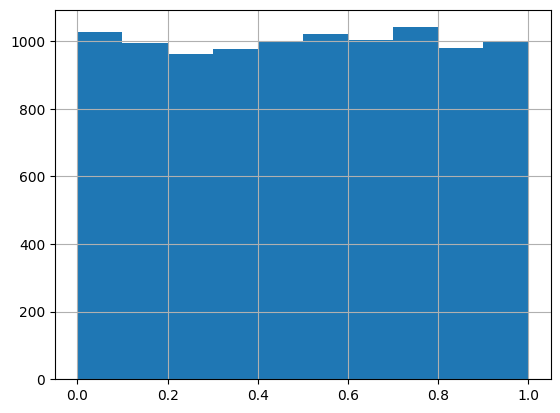

In [ ]:
t = pd.Series(result)

t.hist()

Проверяем с помощью qq графика

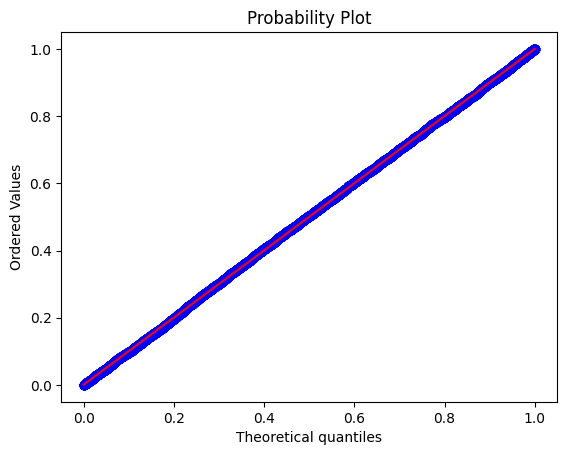

In [ ]:
stats.probplot(t, dist="uniform", plot=pylab)
pylab.show()

In [ ]:
# Рассчитываем ошибку первого рода
(t < 0.05).mean()

0.0516

Как проверить, что можно применять t test:

- выборочное среднее распределено нормально (bootstrap + qq)
- p-value для выборок из одного распределения имеет равномерное распределение (bootstrap + qq)
- теоретический false positive == практическому false positive

### Математически рассчитаем необходимую выборку

In [ ]:
# Предположим, у нас есть некая выборка данных
sample = pd.Series(np.random.normal(10,3,size=1000))

In [ ]:
# Посчитаем стандартное отклонение (предположим его необходимо зафиксировать)
sample.std()

2.9352862681712586

In [ ]:
# Тогда наш effective size (то что нам необходимо детектить) будет равно ->
es = (12 - 10) / sample.std()

In [ ]:
# Математический рассчёт размера выборки
sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

34.799461223042556

### Рассмотрим ненормальное распредление

In [ ]:
# Делаем выборки

a = np.random.lognormal(mean=5, sigma=2, size=(100000,))
b = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))

<Axes: >

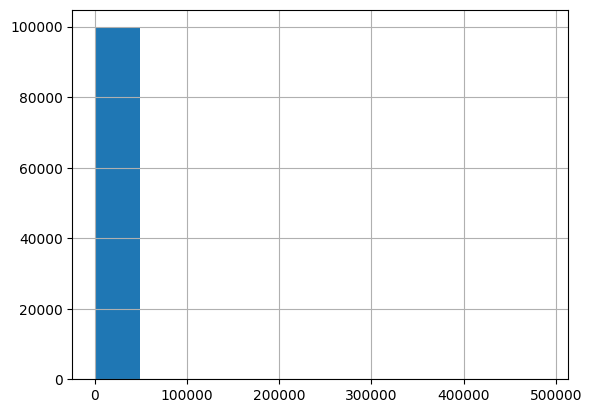

In [ ]:
# Визуализируем получившийся график

pd.Series(a).hist()

In [ ]:
# Ищем средее значение о нашей выборке

t = pd.Series([np.random.lognormal(mean=5, sigma=2, size=(100000,)).mean() for _ in tqdm(range(1000))])

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: >

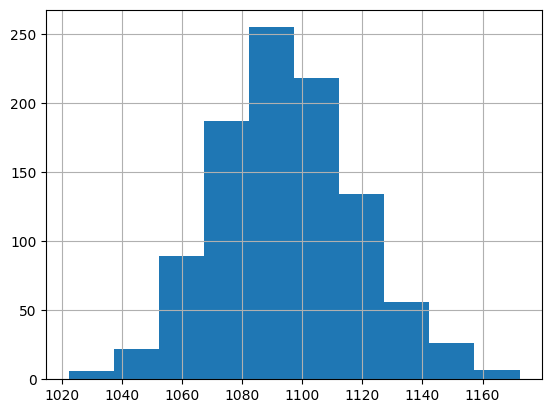

In [ ]:
# Смотрим, получилась ли наша выборка нормальной
t.hist()

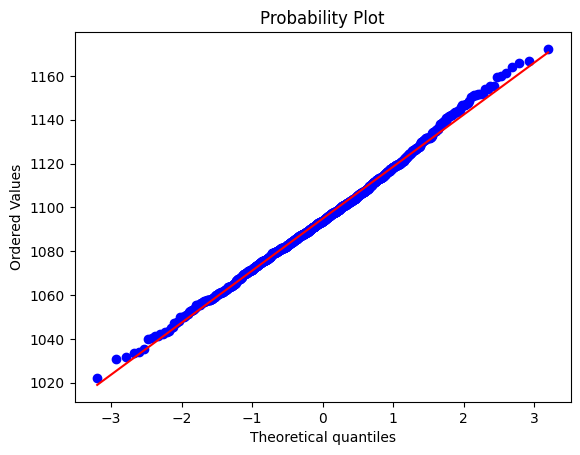

In [ ]:
# С помощью qq графика проверим действительно ли оно нормальное
# Удостоверимся в том, что не получилась

stats.probplot(t, dist="norm", plot=pylab)
pylab.show()

<Axes: >

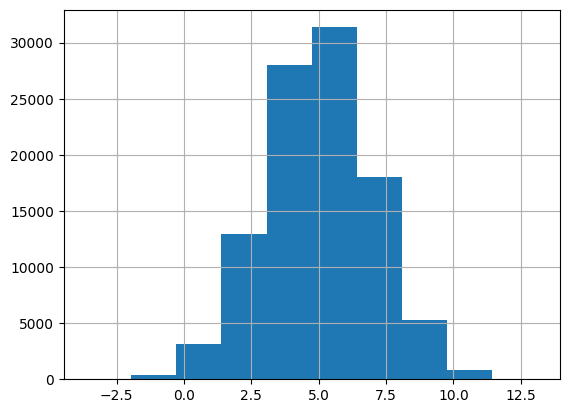

In [ ]:
# В качестве нормализации логарифмируем нашу выборку

np.log(pd.Series(a)).hist()

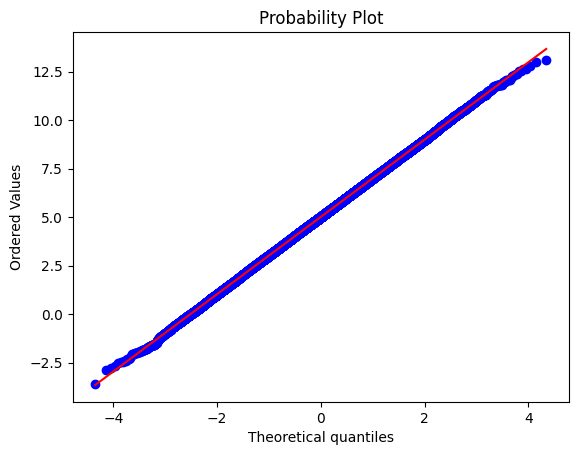

In [ ]:
# С помощью qq графике проверим действительно нам помогло логарифмирование

stats.probplot(np.log(pd.Series(a)), dist="norm", plot=pylab)
pylab.show()

Мы видим что нам уже не подходит t-test, но мы этому не верим и дополнительно проверим другими способами

In [ ]:
# АА тест

result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.random.lognormal(mean=5, sigma=2, size=(100000,))
  b = np.random.lognormal(mean=5, sigma=2, size=(100000,))
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: >

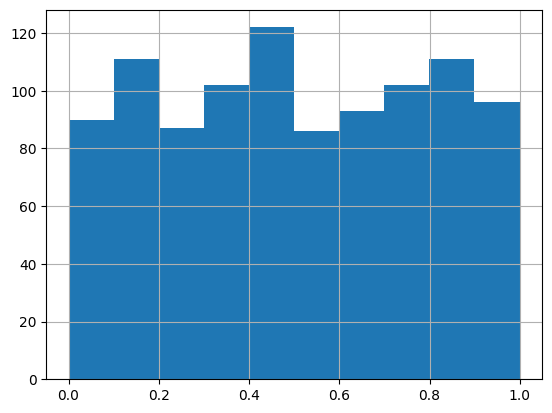

In [ ]:
t = pd.Series(result)

t.hist()

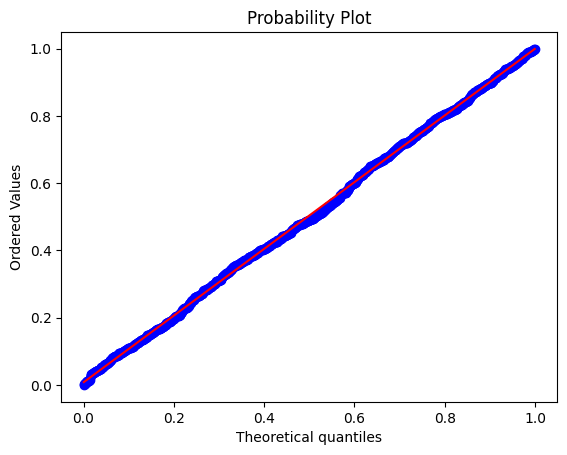

In [ ]:
stats.probplot(t, dist="uniform", plot=pylab)
pylab.show()

In [ ]:
# Проверим ошибку первого рода

(t < 0.05).mean()

0.039

In [ ]:
# Проверим получится ли у нас наша исходная мощность

result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.random.lognormal(mean=5, sigma=2, size=(100000,))
  b = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
t = pd.Series(result)
(t < 0.05).mean()

# Ожидаем увидеть мощность равную 80%, а получаем мощность равую 30%

0.266

### Двумя способами рассчитаем среднее значение для наших выборок

In [ ]:
# Способ через монте-карло

a_mean_bs = pd.Series([np.random.lognormal(mean=5, sigma=2, size=(100000,)).mean() for _ in tqdm(range(1000))]).mean()
b_mean_bs = pd.Series([np.random.lognormal(mean=5.04, sigma=2, size=(100000,)).mean() for _ in tqdm(range(1000))]).mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# Способ через математику)

a_mean_math = np.exp(5 + (2**2)/2)
b_mean_math = np.exp(5.04 + (2**2)/2)

In [ ]:
# Вычислим тот эффект котоырй нам нужно заметить
es = (b_mean_math - a_mean_math) / a.std()

# Вычислим размер необходимой выборки
size = sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)
int(size)

763841

  0%|          | 0/1000 [00:00<?, ?it/s]

<Axes: >

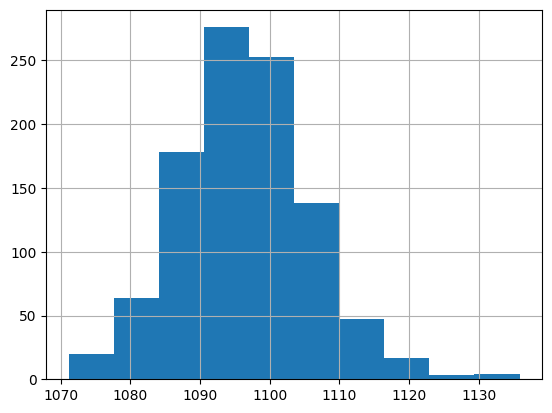

In [ ]:
t = pd.Series([np.random.lognormal(mean=5, sigma=2, size=(int(size),)).mean() for _ in tqdm(range(1000))])

t.hist()

In [ ]:
# Считаем мощность на данных

result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.random.lognormal(mean=5, sigma=2, size=(int(size),))
  b = np.random.lognormal(mean=5.04, sigma=2, size=(int(size),))
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

print()
t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

0.923

In [ ]:
# Считаем мощность на преобразованных данных

result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.log(np.random.lognormal(mean=5, sigma=2, size=(100000,)))
  b = np.log(np.random.lognormal(mean=5.04, sigma=2, size=(100000,)))
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

print()
t = pd.Series(result)
(t < 0.05).mean()

  0%|          | 0/1000 [00:00<?, ?it/s]

0.994

Посчитаем размер выборки для прологорифмированных данных

In [ ]:
# Повторно сгенерируем выборку
a = np.random.lognormal(mean=5, sigma=2, size=(100000,))
a = np.random.lognormal(mean=5.04, sigma=2, size=(100000,))

In [ ]:
# Вычисляем среденее по выборке
print('Вычисляем среденее по выборке ', a.mean())

# Вычисляем среденее по выборке после логарифмировании
print('Вычисляем среденее по выборке после логарифмировании ', np.log(a).mean())

Вычисляем среденее по выборке  1140.8432335650587
Вычисляем среденее по выборке после логарифмировании  5.032206674884717


In [ ]:
# Стандартное отклонение
np.log(a).std()

2.000778891705561

In [ ]:
# Посчитаем эффект который нам нужно заметить
es = (np.log(b_mean_math) - np.log(a_mean_math))/ np.log(a).std()
es

0.019992214115124984

In [ ]:
# Посчитаем необходимый размер выборки
size = sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

size

39275.8365250838

Как мы можем заметить необходимый размер выборки много меньше, чем используемый нами

Такой эффект (логарифмирование данных) называется:

**Метод понижения дисперсии**

In [ ]:
result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.log(np.random.lognormal(mean=5, sigma=2, size=(int(size),)))
  b = np.log(np.random.lognormal(mean=5.04, sigma=2, size=(int(size),)))
  _, pval = ttest_ind(a,b,equal_var=False)
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# Рассчитаем мощность
t = pd.Series(result)
(t < 0.05).mean()

0.783

Загрузим данные из самого первого урока

In [ ]:
! gdown --id 1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6

# Читаем данные
df = pd.read_csv('/content/age_children_income_1000.csv')
df

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zLKWeJ_OZjxuKlP561-GopniC0_Pt_X6
To: /content/age_children_income_1000.csv
100% 38.8k/38.8k [00:00<00:00, 58.1MB/s]


,age,number_of_children,income
0,42.772420,0,34396.537188
1,29.561090,0,183350.052521
2,54.380735,0,53689.856555
3,42.551689,0,109080.913926
4,38.713080,0,153612.343419
...,...,...,...
995,36.281055,0,128647.922872
996,18.472716,0,67204.531673
997,40.547748,0,139432.757984
998,24.791760,1,137526.452334


In [ ]:
# Рассчиаем среднее значение для колонки
df['income'].mean()

129415.74637843431

<Axes: >

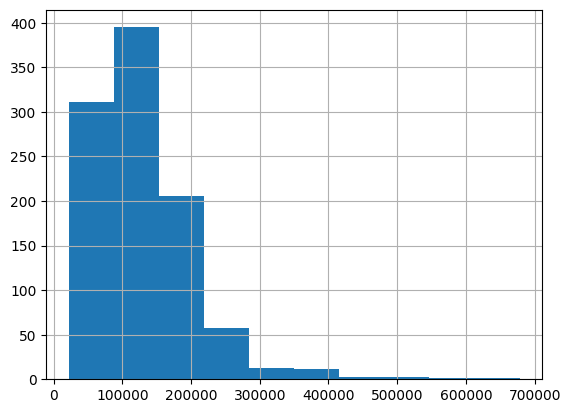

In [ ]:
# Посмотрим на гистограмму
df['income'].hist()

<Axes: >

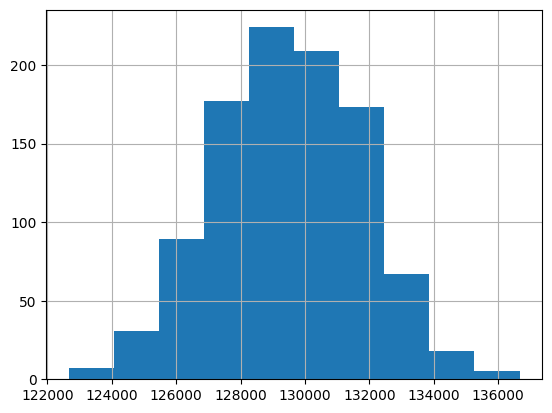

In [ ]:
# Отмонтекарлим данные, чтобы посмотреть получится ли у нас нормальное распределение
pd.Series([df['income'].sample(1000,replace=True).mean() for _ in range(1000)]).hist()

Допустим, нам нужно увеличить наше среднее с имеющегося значения до 150000

Рассчитаем значимый эффект

In [ ]:
es = (150000 - int(df['income'].mean())) / df['income'].std()
es

0.2889057079624035

In [ ]:
sms.TTestIndPower().solve_power(es, power=0.80, alpha=0.05, ratio=1)

189.03726905497706

<Axes: >

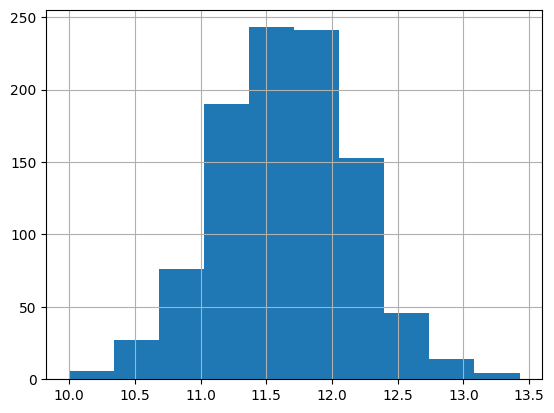

In [ ]:
# Применим логарифм и посмотрим как будет выглядеть наше распределение
np.log(df['income']).hist()

В нашем случае у нас нет второй выборки, поэтому нам нужно её сгенерировать.

Чтобы сгенерировать выборку, нам нужно определиться с генератом. Выберем генератор следуцющим образом::

  1 / 106: ksone
  2 / 106: kstwo
  3 / 106: kstwobign
  4 / 106: norm
  5 / 106: alpha
  6 / 106: anglit
  7 / 106: arcsine
  8 / 106: beta
  9 / 106: betaprime
 10 / 106: bradford
 11 / 106: burr
 12 / 106: burr12
 13 / 106: fisk
 14 / 106: cauchy
 15 / 106: chi
 16 / 106: chi2
 17 / 106: cosine
 18 / 106: dgamma
 19 / 106: dweibull
 20 / 106: expon
 21 / 106: exponnorm
 22 / 106: exponweib
 23 / 106: exponpow
 24 / 106: fatiguelife
 25 / 106: foldcauchy
 26 / 106: f
 27 / 106: foldnorm
 28 / 106: weibull_min
 29 / 106: truncweibull_min
 30 / 106: weibull_max
 31 / 106: genlogistic
 32 / 106: genpareto
 33 / 106: genexpon
 34 / 106: genextreme
 35 / 106: gamma
 36 / 106: erlang
 37 / 106: gengamma
 38 / 106: genhalflogistic
 39 / 106: genhyperbolic
 40 / 106: gompertz
 41 / 106: gumbel_r
 42 / 106: gumbel_l
 43 / 106: halfcauchy
 44 / 106: halflogistic
 45 / 106: halfnorm
 46 / 106: hypsecant
 47 / 106: gausshyper
 48 / 106: invgamma
 49 / 106: invgauss
 50 / 106: geninvgauss
 51 / 1

Text(0, 0.5, 'Frequency')

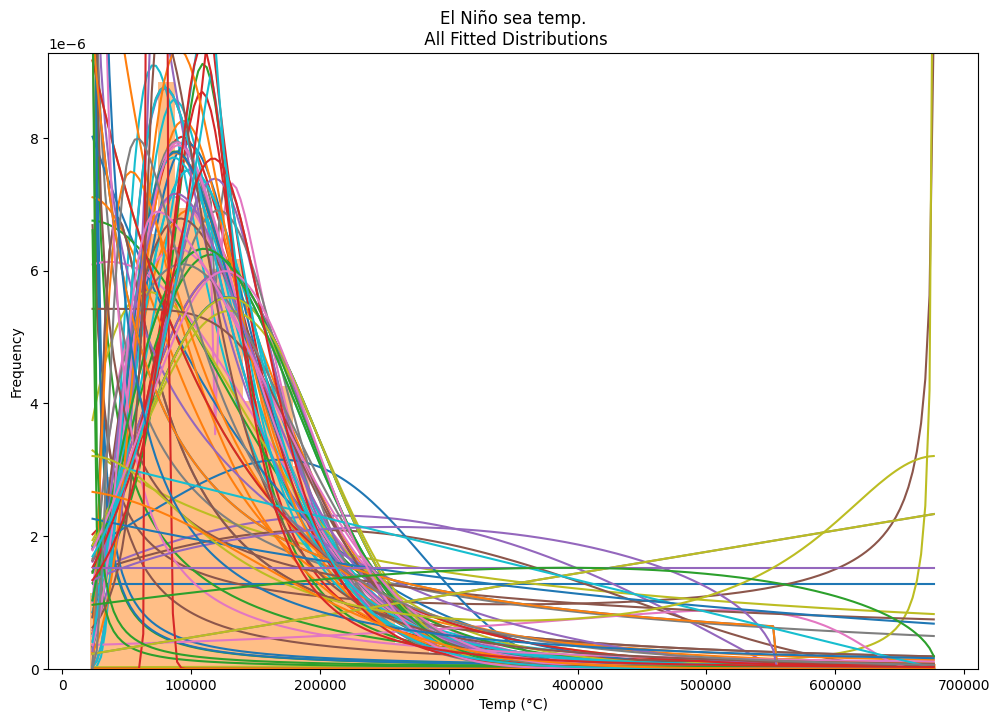

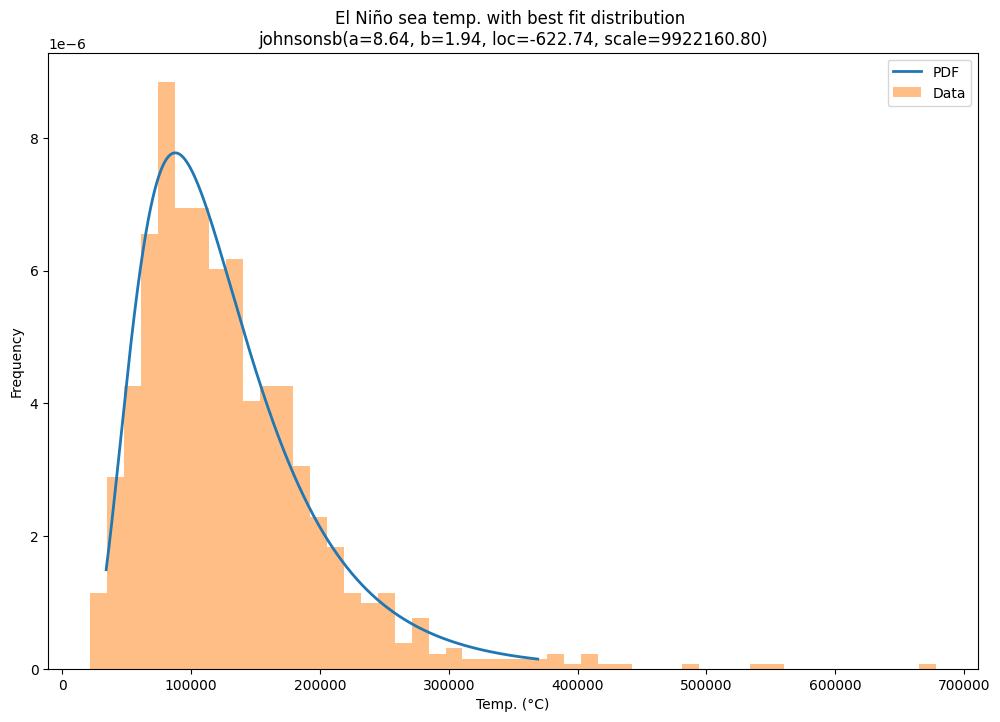

In [ ]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats._continuous_distns import _distn_names
import matplotlib
import matplotlib.pyplot as plt

# matplotlib.rcParams['figure.figsize'] = (16.0, 12.0)
# matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=200, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Best holders
    best_distributions = []

    # Estimate distribution parameters from data
    for ii, distribution in enumerate([d for d in _distn_names if not d in ['levy_stable', 'studentized_range']]):

        print("{:>3} / {:<3}: {}".format( ii+1, len(_distn_names), distribution ))

        distribution = getattr(st, distribution)

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                best_distributions.append((distribution, params, sse))

        except Exception:
            pass


    return sorted(best_distributions, key=lambda x:x[2])

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

#####################################################################################
# Здесь мы указали наши данные
# Load data from statsmodels datasets
data = df['income']
#####################################################################################

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=50, density=True, alpha=0.5, color=list(matplotlib.rcParams['axes.prop_cycle'])[1]['color'])

# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_distibutions = best_fit_distribution(data, 200, ax)
best_dist = best_distibutions[0]

# Update plots
ax.set_ylim(dataYLim)
ax.set_title(u'El Niño sea temp.\n All Fitted Distributions')
ax.set_xlabel(u'Temp (°C)')
ax.set_ylabel('Frequency')

# Make PDF with best params
pdf = make_pdf(best_dist[0], best_dist[1])

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
data.plot(kind='hist', bins=50, density=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist[0].shapes + ', loc, scale').split(', ') if best_dist[0].shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_dist[1])])
dist_str = '{}({})'.format(best_dist[0].name, param_str)

ax.set_title(u'El Niño sea temp. with best fit distribution \n' + dist_str)
ax.set_xlabel(u'Temp. (°C)')
ax.set_ylabel('Frequency')

In [ ]:
# # Сбрасываем имеющуюся настройку графиков
# import matplotlib as mpl
# mpl.rcParams.update(mpl.rcParamsDefault)

In [ ]:
# Мы получаем все распределения, нам нужно то которое получает наименьшую ошибку
# поэтому мы сортируем по 2 колонке
t = pd.DataFrame(best_distibutions).sort_values(2)
t

,0,1,2
0,<scipy.stats._continuous_distns.johnsonsb_gen ...,"(8.635547387774977, 1.940117105713055, -622.73...",1.079567e-10
1,<scipy.stats._continuous_distns.norminvgauss_g...,"(29.067271580227185, 28.826575678471475, -3576...",1.079802e-10
2,<scipy.stats._continuous_distns.lognorm_gen ob...,"(0.5025175713532029, -1861.8778563039434, 1156...",1.079923e-10
3,<scipy.stats._continuous_distns.johnsonsu_gen ...,"(-6.473814796203333, 1.9820095590762135, -996....",1.080549e-10
4,<scipy.stats._continuous_distns.moyal_gen obje...,"(89998.53204903823, 30662.92827229847)",1.087651e-10
...,...,...,...
94,<scipy.stats._continuous_distns.powerlognorm_g...,"(0.003741198473964768, 0.31146674447282985, 21...",5.363231e-09
102,<scipy.stats._continuous_distns.recipinvgauss_...,"(0.017136930690140096, 45268.31702885401, 467....",2.123445e-08
103,<scipy.stats._continuous_distns.vonmises_gen o...,"(0.03777345583844153, 1.1070353226446379, 1)",5.063193e+00
66,<scipy.stats._continuous_distns.mielke_gen obj...,"(1009.044467627845, 1.951757980729706, -15.043...",NaN


In [ ]:
# Смотрим лучший генератор
t[0][0]

In [ ]:
# Параметры лучшего генератора
t[1][0]

(8.635547387774977, 1.940117105713055, -622.7363950863808, 9922160.800678246)

In [ ]:
# Мы делаем всё проще, мы просто прибавим новое значение к имеющейся выборке
(df['income'] + 20000).mean()

149415.7463784343

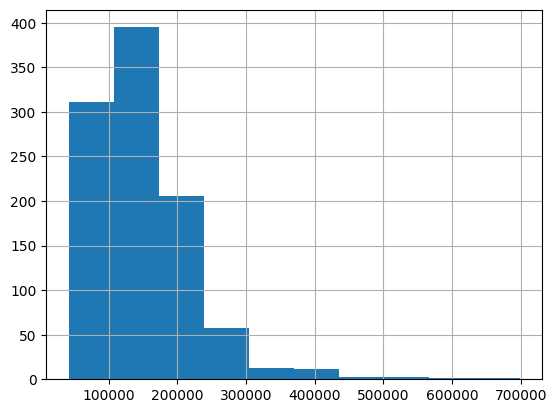

In [ ]:
# Построим гисторамму для новых данных
(df['income'] + 20000).hist();

In [ ]:
# Импорт интересующего нас теста
from scipy.stats import mannwhitneyu

# T-Тест работает быстрее, но если мы не уверены какой из тестов мы можем применять, тест Ман Витни Ю применяется для большинства данных.
# Такой тест работает больше !

In [ ]:
# Рассчитаем мощность с его помощью
result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.log(np.random.lognormal(mean=5, sigma=2, size=(42000,)))
  b = np.log(np.random.lognormal(mean=5.04, sigma=2, size=(42000,)))
  _, pval = mannwhitneyu(a,b,alternative='two-sided')
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# Рассчитаем мощность
t = pd.Series(result)
(t < 0.05).mean()

0.797

In [ ]:
result = []
n = 1000
for _ in tqdm(range(n)):
  a = np.log(np.random.lognormal(mean=5, sigma=2, size=(42000,)))
  b = np.log(np.random.lognormal(mean=5, sigma=2, size=(42000,)))
  _, pval = mannwhitneyu(a,b,alternative='two-sided')
  result.append(pval)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
# Рассчитаем ошибку первого рода
t = pd.Series(result)
(t < 0.05).mean()

0.037

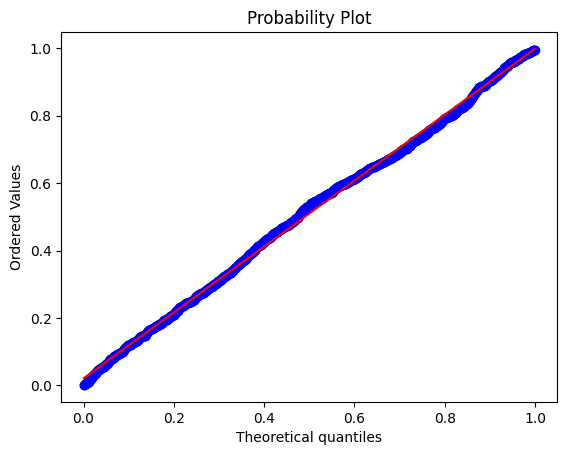

In [ ]:
# Смотрим распредление
stats.probplot(t, dist="uniform", plot=pylab)
pylab.show()

<Axes: >

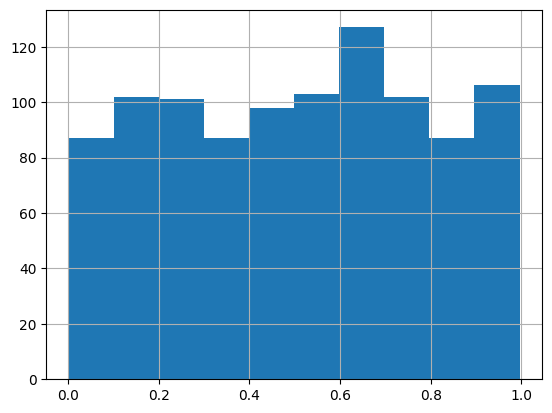

In [ ]:
# Строим гистограмму
t.hist()

<a name="multi_gip"></a>

## Урок №8 - Множественная проверка гипотез

[Оглавление](#оглавление)

In [ ]:
# Сайт с первой задачей

# http://www.machinelearning.ru/wiki/index.php?title=%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%B5%D0%BD%D0%BD%D0%B0%D1%8F_%D0%BF%D1%80%D0%BE%D0%B2%D0%B5%D1%80%D0%BA%D0%B0_%D0%B3%D0%B8%D0%BF%D0%BE%D1%82%D0%B5%D0%B7


# Прикольнные сайты
# https://www.evanmiller.org/ab-testing/sample-size.html
# https://www.tylervigen.com/spurious-correlations

In [ ]:
import pandas as pd
import numpy as np

# Добавляем прогресс-бар
from tqdm.notebook import tqdm

# Импортируем тест
from statsmodels.stats.proportion import proportions_ztest

### Задача 1

В 1950 году Джозеф Райн проводил эксперименты по выявлению людей с экстрасенсорными способностями. Каждый испытуемый должен был угадать цвет каждой карты в последовательности из 10 карт. В таком опыте вероятность случайно угадать 9 или 10 карт из 10 составляет 11*2^-10 ≈ 0.01 — достаточно редкое событие, чтобы признать его маловероятным, поэтому Райн считал его свидетельством того, что испытуемый — экстрасенс. Однако, поскольку в опыте участвовало 1000 человек, вероятность того, что хотя бы один из них случайно угадает 9 или 10 карт составляла 1-(1-11*2^-10)^1000 ≈ 0.9998. Действительно, из 1000 испытуемых 12 человек угадали 9 из 10 карт, двое — все 10 карт. В последующих экспериментах ни один из них не подтвердил свои способности.

In [ ]:
# Моделируем разложенную колоду карт
cards = np.random.binomial(1, 0.5, size = 10)

cards

array([1, 0, 1, 0, 0, 0, 1, 0, 1, 1])

In [ ]:
# Моделируем карты угаданные экстрасенсом
guess = np.random.binomial(1, 0.5, size = 10)

guess

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [ ]:
# Сравним результаты эксперимента
cards == guess

array([False,  True,  True, False,  True, False, False, False,  True,
        True])

In [ ]:
(cards == guess).sum() >= 9

False

In [ ]:
# Монтекарлим наши выборки
n = 10000
result = []
for _ in tqdm(range(n)):
  cards = np.random.binomial(1,0.5,size=10)
  guess = np.random.binomial(1,0.5,size=10)
  result.append((cards == guess).sum() >= 9)

# Получаем результат нашего исследования
np.mean(result)

  0%|          | 0/10000 [00:00<?, ?it/s]

0.0119

In [ ]:
# Переделаем наш код, для более удобного его использования
def experiment():
  cards = np.random.binomial(1,0.5,size=10)
  guess = np.random.binomial(1,0.5,size=10)
  return (cards == guess).sum() >= 9

# Получаем результат
np.mean([experiment() for _ in range(10000)])

0.0103

Представляем нулевую гипотизу

**H0:** эксрасенсов нет  
**H1:** экстрасенсы есть

In [ ]:
# any - показывает есть ли хотя бы один true
any([True,False,False])

True

In [ ]:
# Считаем вероятность встретить экстрасенса на выборки из 10 человек
np.mean([any([experiment() for _ in range(10)]) for _ in range(1000)])

0.099

In [ ]:
# Считаем вероятность встретить экстрасенса на выборки из 100 человек
np.mean([any([experiment() for _ in range(100)]) for _ in range(1000)])

0.645

In [ ]:
# Считаем вероятность встретить экстрасенса на выборки из 1000 человек
np.mean([any([experiment() for _ in range(1000)]) for _ in range(1000)])

1.0

In [ ]:
# Смоделируем выборку чтобы проследить как у нас будет увеличиваться вероятность
group_size = [10,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900,1000]

In [ ]:
result = []
for number_of_people in tqdm(group_size):
  prob = np.mean([any([experiment() for _ in range(number_of_people)]) for _ in range(1000)])
  result.append(prob)

  0%|          | 0/19 [00:00<?, ?it/s]

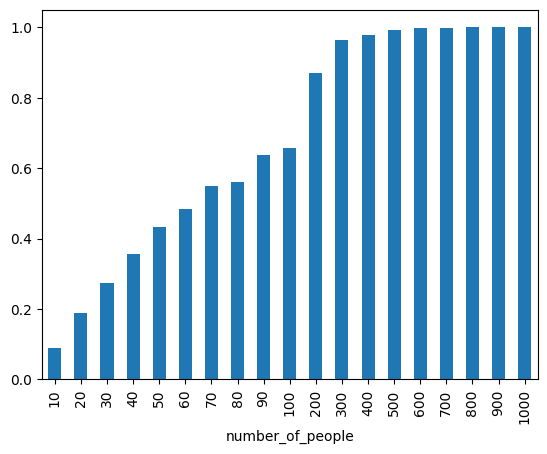

In [ ]:
# Переводим результат в DataFrame
t = pd.DataFrame({'number_of_people': group_size,
                  'prob': result})

# Строим график для получившегося результата
t.set_index('number_of_people')['prob'].plot(kind='bar');

In [ ]:
# Математически рассчитаем вероятность
t['prob_formula'] = 1 - (1 - 0.01) ** t['number_of_people']

# Наш DataFrame
t

,number_of_people,prob,prob_formula
0,10,0.089,0.095618
1,20,0.188,0.182093
2,30,0.274,0.260300
3,40,0.356,0.331028
4,50,0.433,0.394994
5,60,0.483,0.452843
6,70,0.550,0.505161
7,80,0.562,0.552477
8,90,0.639,0.595268
9,100,0.658,0.633968


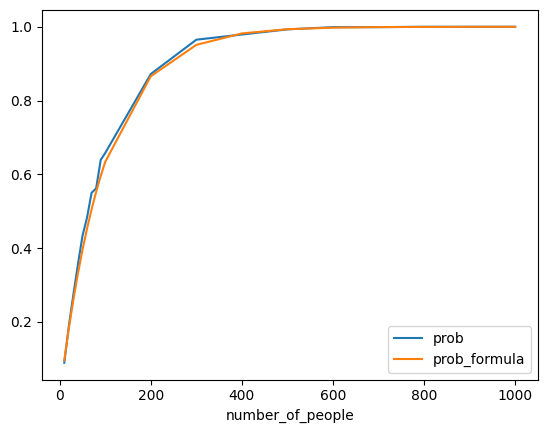

In [ ]:
# Сравниваем графики которые мы получили в результате Монтекарло / Математически

t.set_index('number_of_people').plot();

### Множественная проверка гипотез

Такие гипотизы могут выглядеть так

*test1*  
*test2*  
*control*  

А могут выглядеть так

*test1*  
*control1*  
*test2*  
*contro2*  

Сформулируем гипотизу

H0: разницы между группами нет == пришли из одного распределения  
H1: разница есть (это двусторонний)


Собираем доказательства: мы генерим две выборки и считаем разницу между ними

In [ ]:
a = np.random.binomial(1,0.2,size=1030)
a

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
b = np.random.binomial(1,0.2,size=1030)
b

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Среднее значение по выборке a - ', a.mean())
print('Среднее значение по выборке b - ', b.mean())
print()
print('Разница по выборкам a / b - ', abs(a.mean() - b.mean()))

Среднее значение по выборке a -  0.21067961165048543
Среднее значение по выборке b -  0.1941747572815534

Разница по выборкам a / b -  0.016504854368932037


Что в этом случае p-value? Это вероятность получить разницу такую же что и получили выше или больше (при верной нулевой гипотезе), т.е. что разницы между группами нет.

In [ ]:
_, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)],alternative='two-sided')
pval

0.3512480108277698

In [ ]:
def experiment():
  a = np.random.binomial(1,0.2,size=1030)
  b = np.random.binomial(1,0.2,size=1030)
  _, pval = proportions_ztest([a.sum(),b.sum()],[len(a),len(b)],alternative='two-sided')
  return pval

In [ ]:
# Рассчитаем ошибку 1ого рода
(pd.Series([experiment() for _ in range(1000)]) < 0.05).mean()

0.055

In [ ]:
#  Модельруем множественную проверку гипотизы
any([experiment() < 0.05 for _ in range(2)])

False

In [ ]:
# Верочтность того что группа дала статистически важный результат

np.mean([any([experiment() < 0.05 for _ in range(2)]) for _ in tqdm(range(10000))])

  0%|          | 0/10000 [00:00<?, ?it/s]

0.0911

In [ ]:
# Математический пример рассчёта
1 - (1 - 0.05) ** 2

0.09750000000000003

In [ ]:
np.mean([any([experiment() < 0.05 for _ in range(3)]) for _ in tqdm(range(10000))])

  0%|          | 0/10000 [00:00<?, ?it/s]

0.1405

In [ ]:
1 - (1 - 0.05) ** 3

0.1426250000000001

Смотрим зависимость ошибки первого рода от значения p-value

In [ ]:
np.mean([any([experiment() < 0.05 for _ in range(10)]) for _ in tqdm(range(1000))])

  0%|          | 0/1000 [00:00<?, ?it/s]

0.38

In [ ]:
# Поправка Бонферрони (понижаем на колл-во групп)
np.mean([any([experiment() < (0.05 / 10) for _ in range(10)]) for _ in tqdm(range(1000))])

# Такая поправка снижает мощность

  0%|          | 0/1000 [00:00<?, ?it/s]

0.052

<!-- <a name="multi_gip"></a> -->

## Финал

[Оглавление](#оглавление)